# Connect Demographics

* Breakdown by Age, Gender, Ethnicity and Income
* Breakdown by All Connect / Region / B2B vs. B2C

## Findings:

__All Connect__:

    * Age (50% missing data):
        * Majority of connect students are younger than 35 years old.
        * More than half of this majority are younger than 25 years old.
    * Gender (44% missing data):
        * Male : Female ~ 1 : 1
    * Ethnicity (95% missing data):
        * According to data we collected, biggest Portion of our students are Asian, next is White.
    * Income (95% missing data):
        * According to data we collected, majority of our students have annual income less than $50K.
    * Education (44% missing data):
        * Majority of connect students’ highest education level is Bachelor’s degree (58% of data we collected); 16% have high school education; 17% have master degree.
    * Employment (44% missing data):
        * 41% full time; 26% unemployed; 20% students.
    * Professional Experience (44% missing data):
        * 25% no professional experience; 24% < 1 year; 20% 1 - 2 years.

__Region (US, SA)__: - little collected at IN, CN and GB with a lot of missing data; SA collected 95+% of data; US miss a lot of data so the below is just reference based on what we collected.
    * Age:
        * The average age of students in SA is younger than US. Majority of students at SA are between 18-25; majority at US are between 25-35.
    * Gender:
        * US has more Male students than Female; SA has more Female students.
    * Ethnicity:
        * Asian is the biggest portion among US students (with limited data); at SA there’re more Black / African American students.
    * Income:
        * Both at US and SA students have annual income less than $25K. At US, there’re more students have higher annual income, compared to SA. 
    * Education:
        * Majority students in US has bachelor degree; SA has more high school than bachelor.
    * Employment:
        * In general our students are full time employed.
    * Professional Experience:
        * US students tend to have more experience; SA students have < 1 year experience (including no experience).

__B2C vs. B2G vs. B2B__: (same as above B2G captured most of the data because they are mostly in Saudi; the rest category has a lot of missing data)
    * Age:
        * B2G students tend to be younger than B2C or B2B.
    * Gender:
        * B2G is the only category that has more female students than male.
    * Ethnicity, Income:
        * Not too much data to compare plus region difference.
    * Education:
        * B2C has higher education level than B2G in general.
    * Employment:
        * B2G majority are students or unemployed.
    * Professional Experience
        * B2G tend to have less experience than other categories.

__All (including term + connect; paid students only)__:

* Gender: 
    * Among paid students, male is 86%, compared to application demographics almost 1:1.
    * Connect has way more balanced gender ratio.
* Ethnicity:
    * Majority of our students are Asian. (95% data missing)
* Income:
    * Connect tend to have lower income compared to term: < \$50k annually.
* Education: 
    * 45% master, 35% bachelor, 10% PhD.
* Employment: 
    * 68% full time; 11% students; 6% part time/contract.
    * Connect has more students unemployed (second largest group is full time).
* Professional Experience: 
    * 47% 5+ years; 19% 1 - 2+ years; 17% 3 - 5 years.

## All Connect by Age, Gender, Ethnicity, Income, Education, Employment and Professional Experience

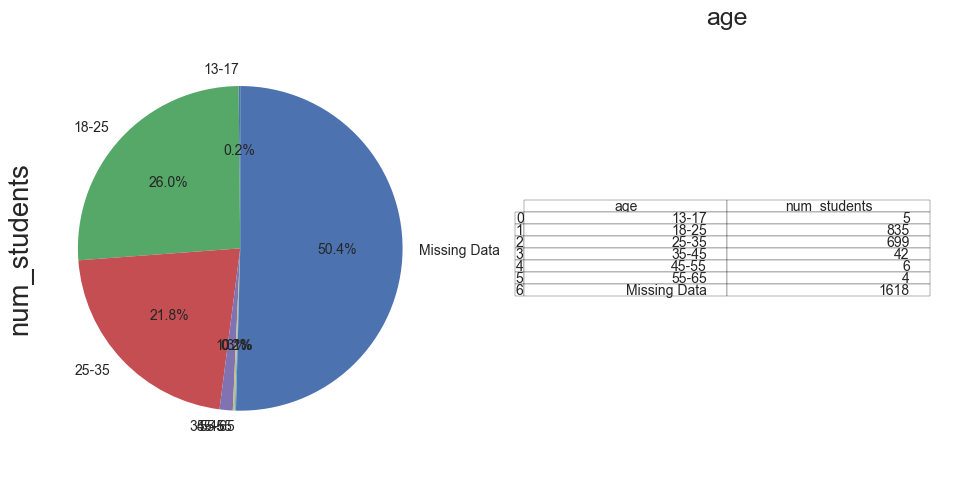

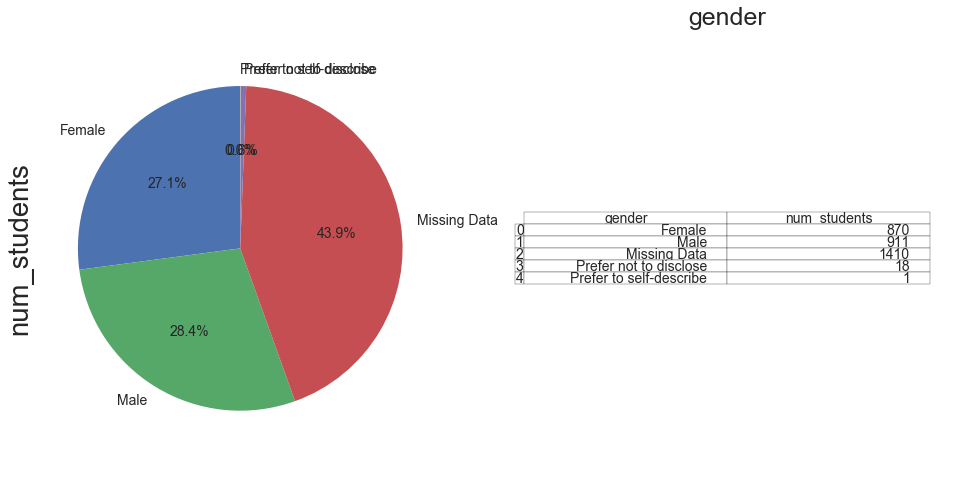

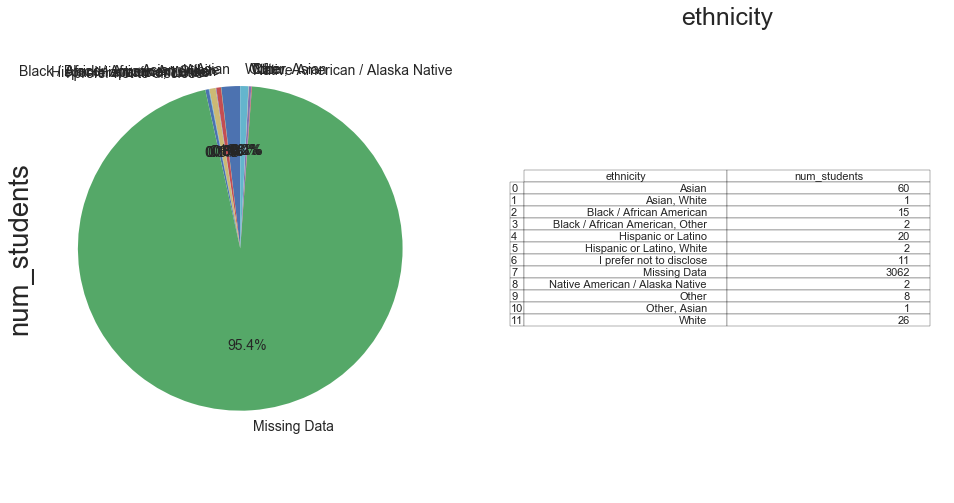

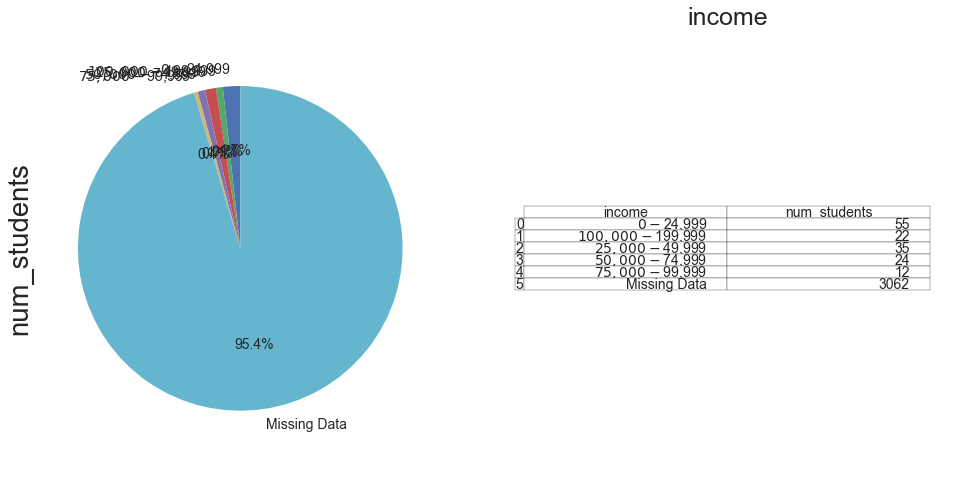

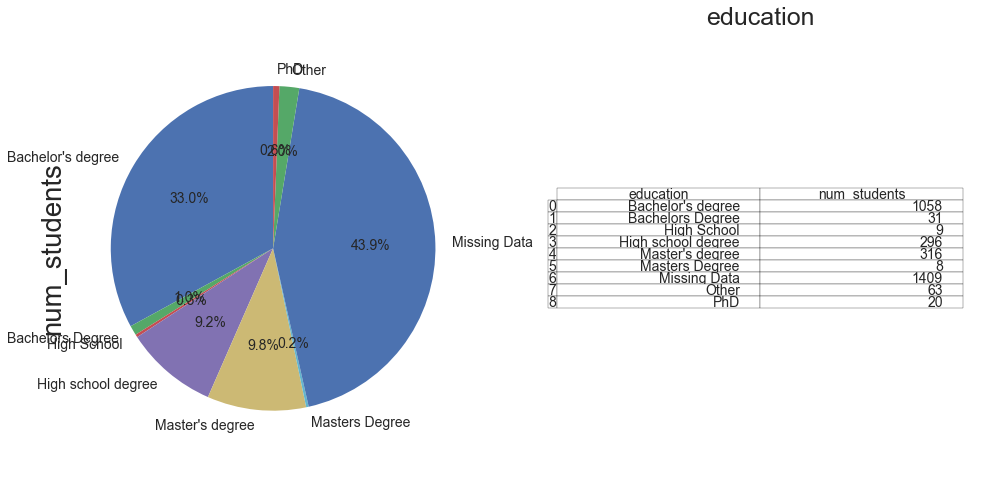

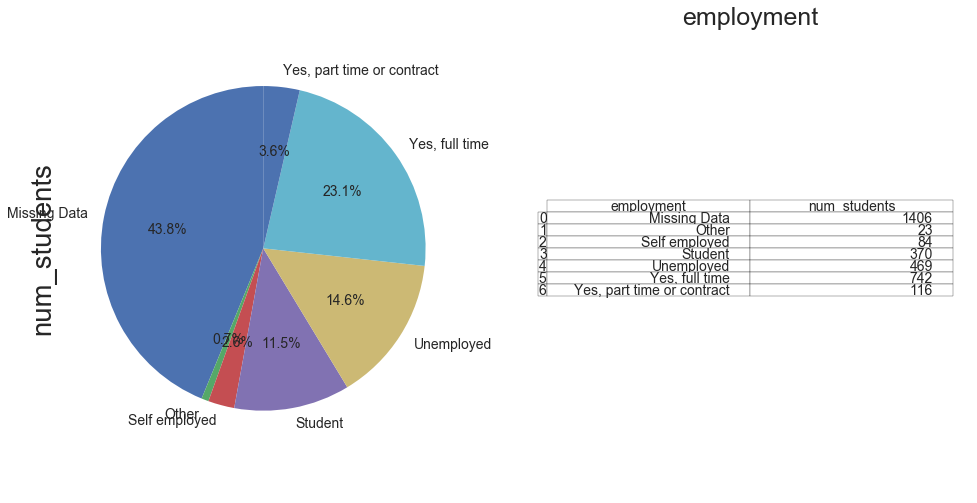

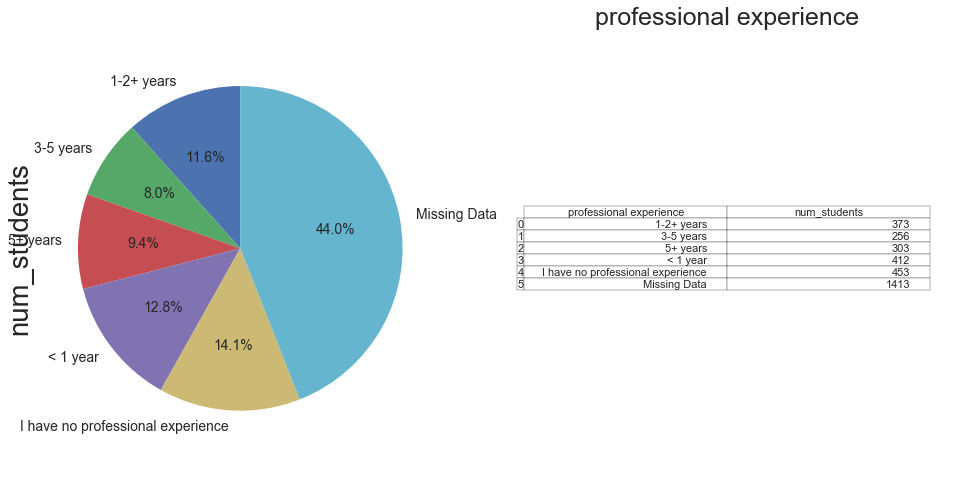

In [53]:
data.plot(by='all')

## All Connect by Age, Gender, Ethnicity,Income, Education, Employment and Professional Experience; Excluded Missing Data

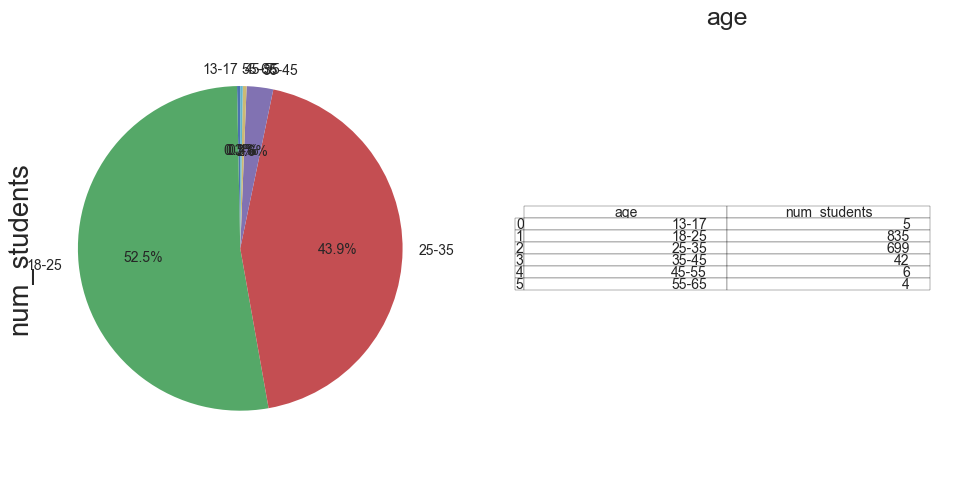

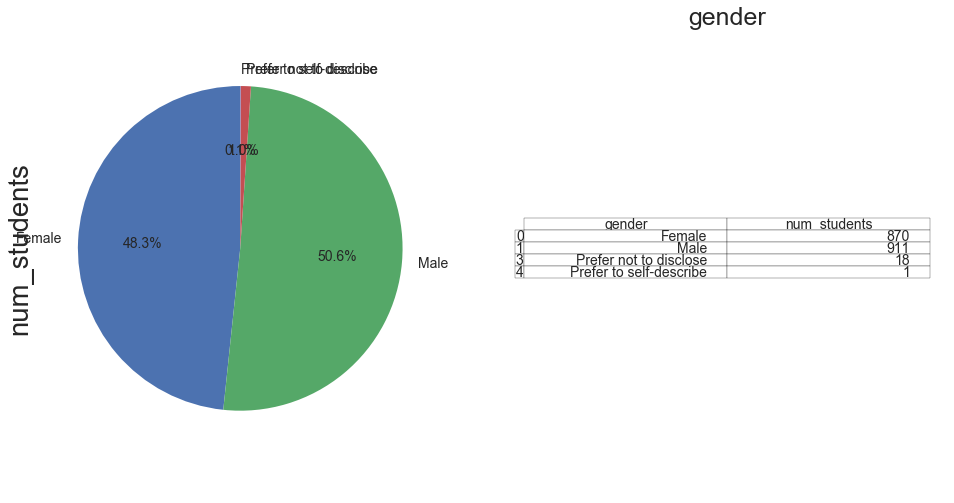

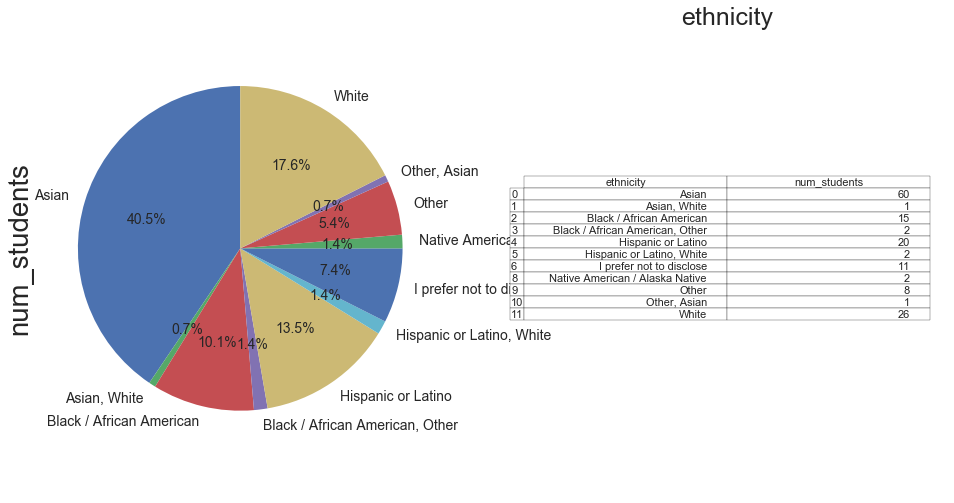

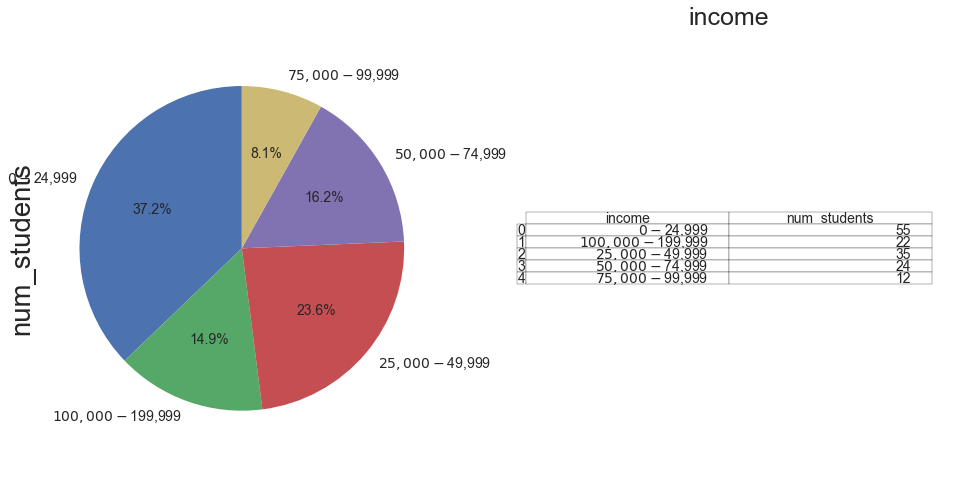

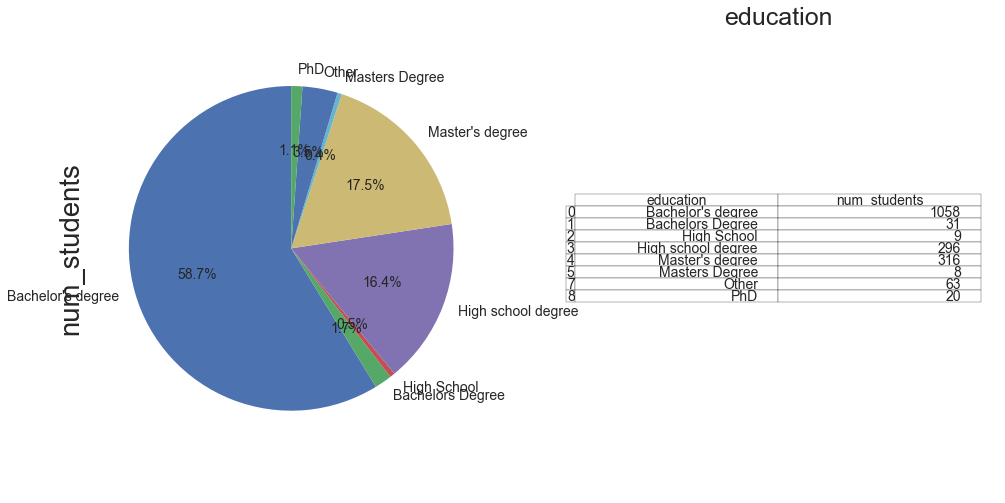

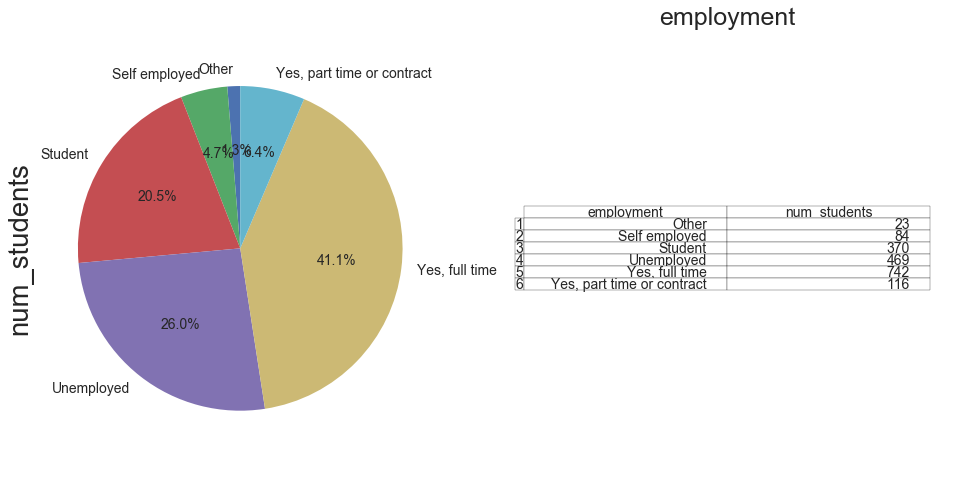

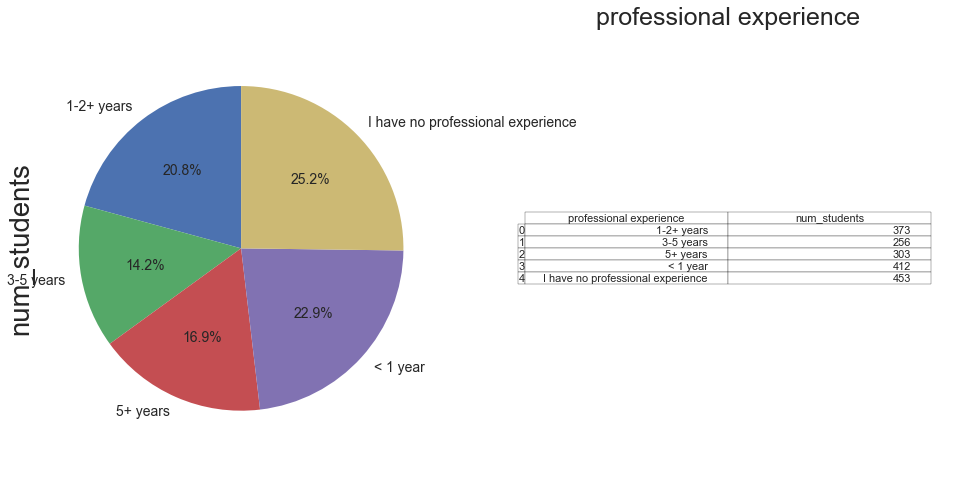

In [54]:
data.plot(by='all',exclude_missing_data=True)

## Region by Age, Gender, Ethnicity, Income, Education, Employment and Professional Experience

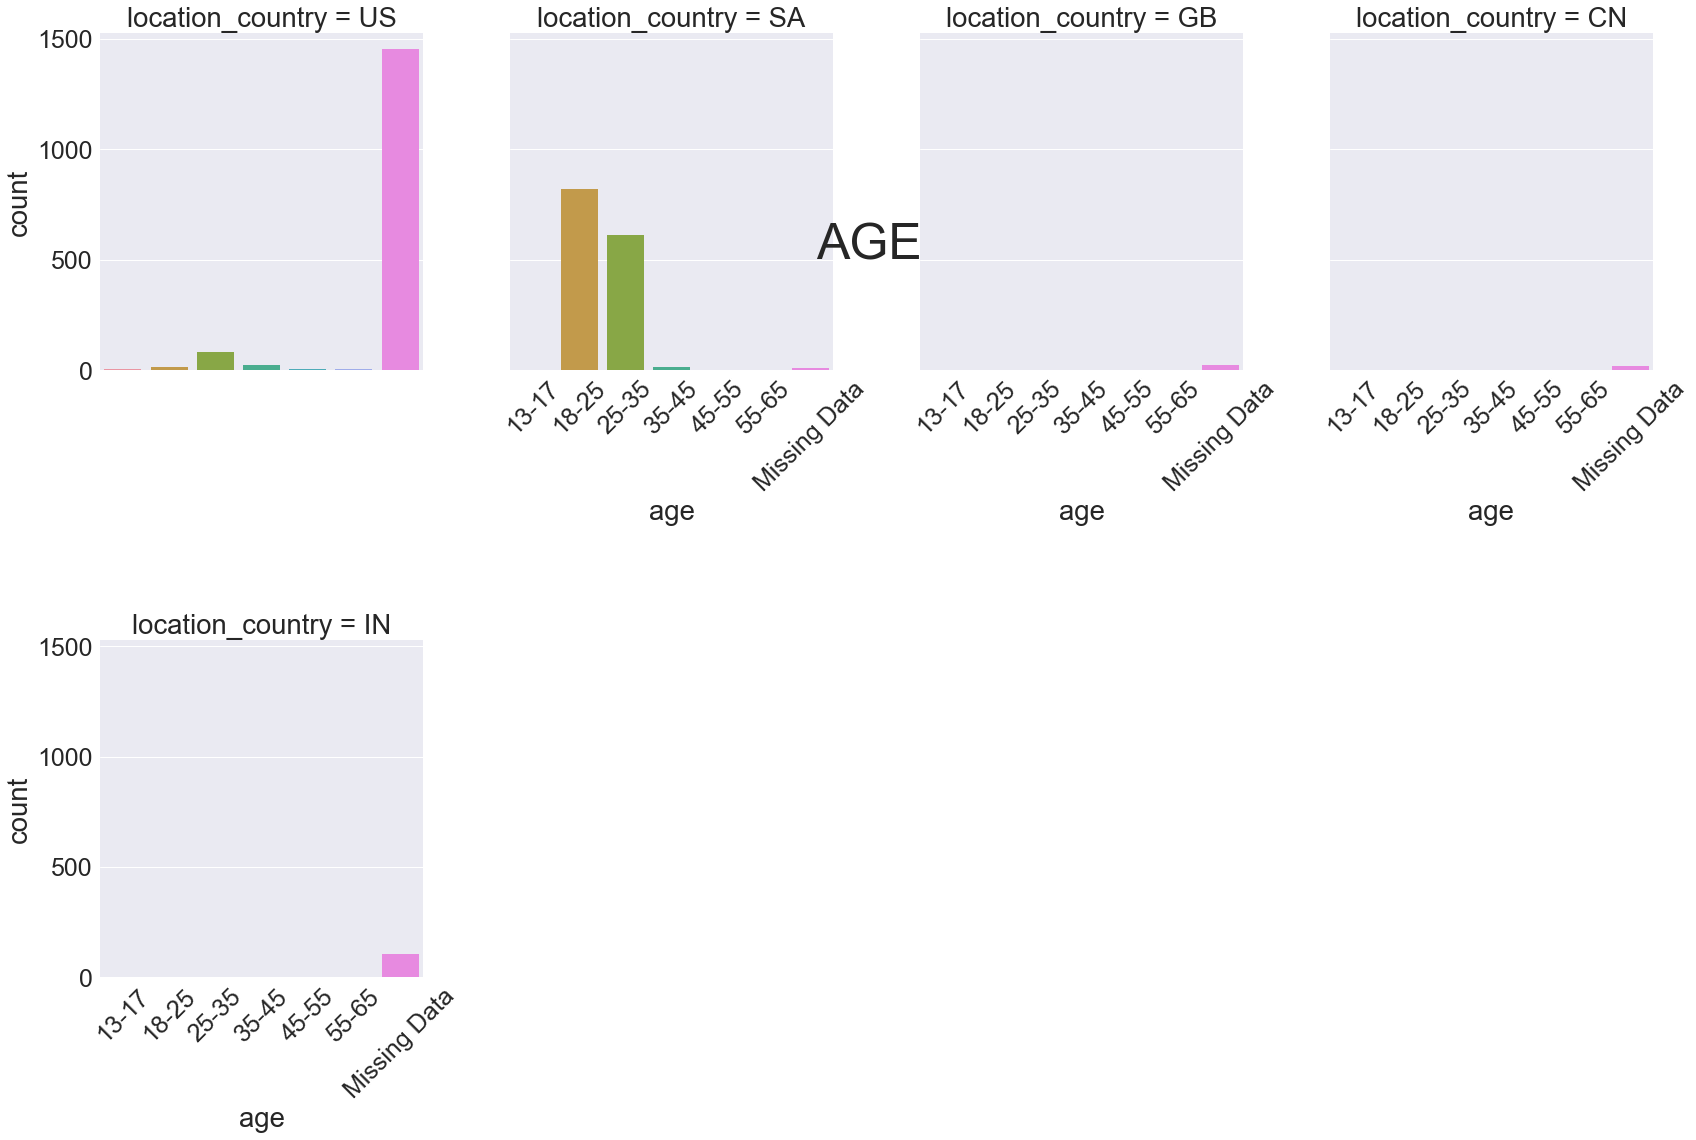

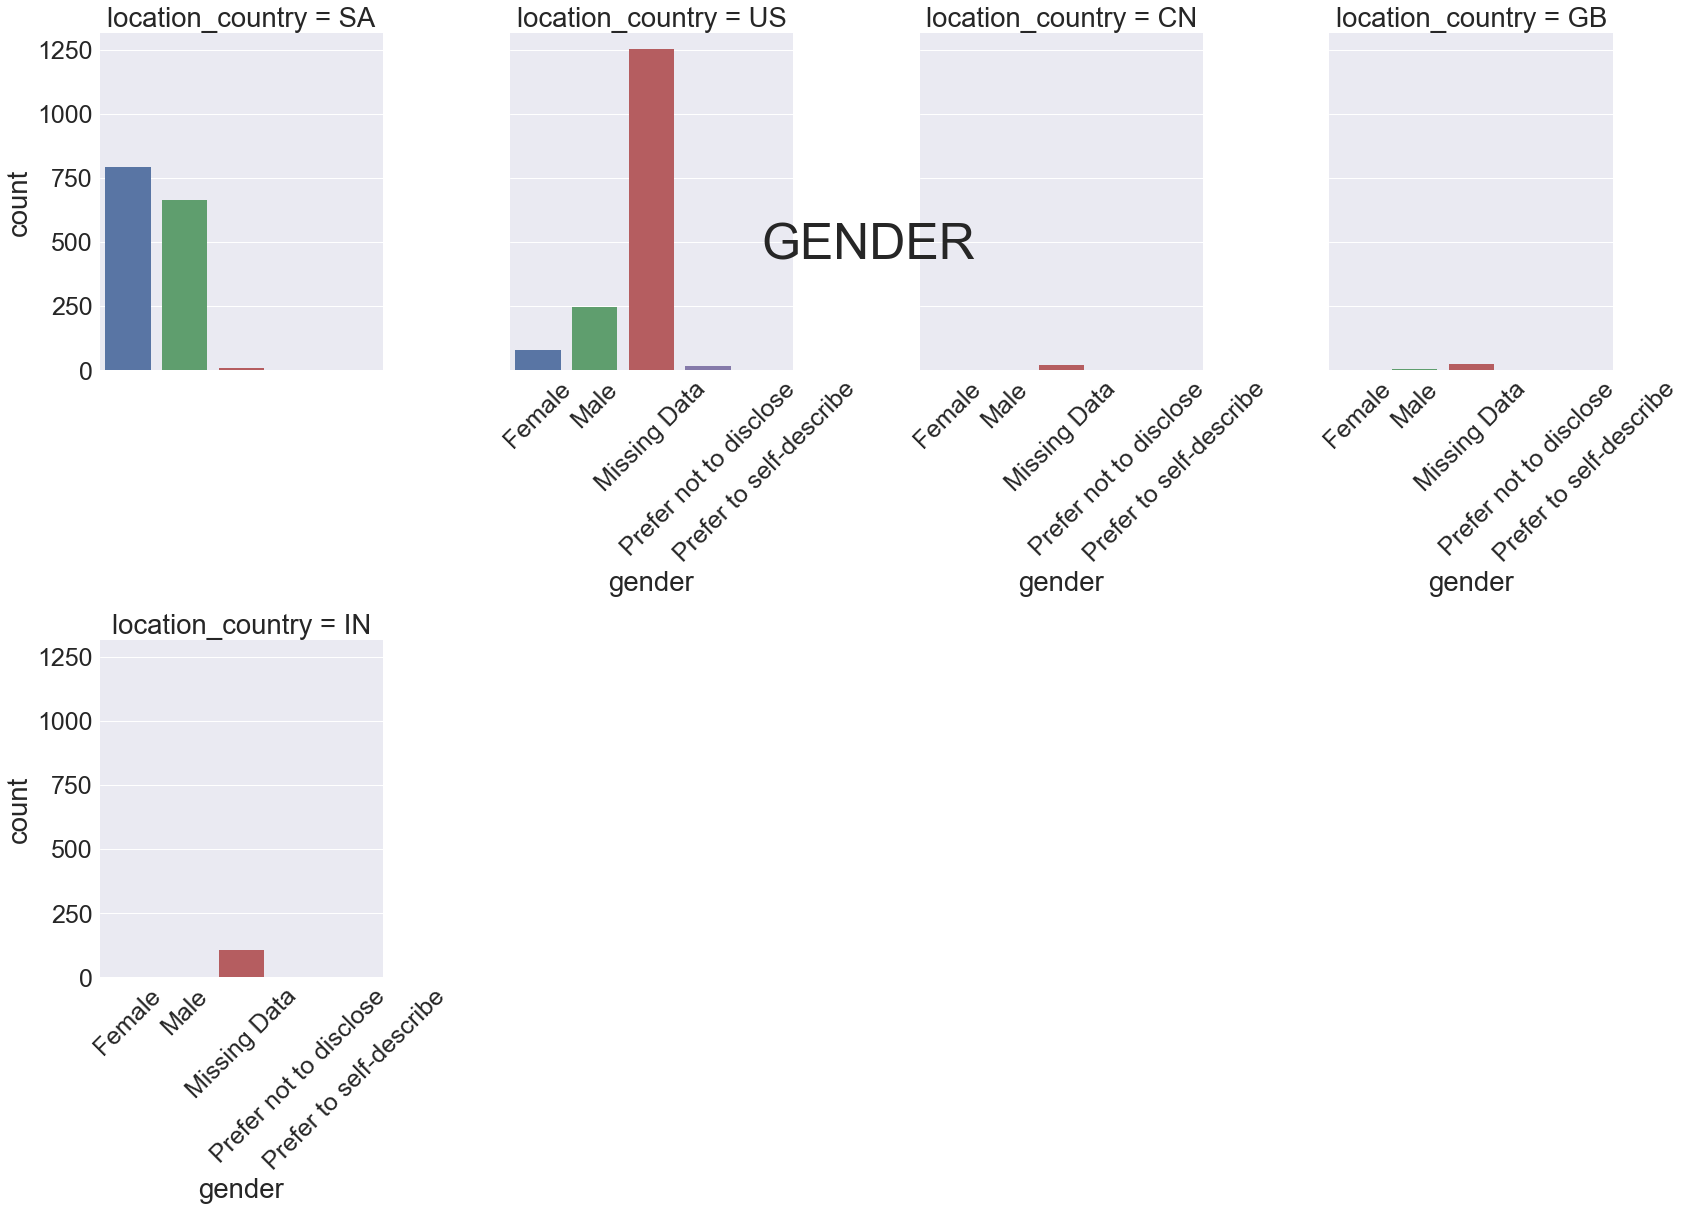

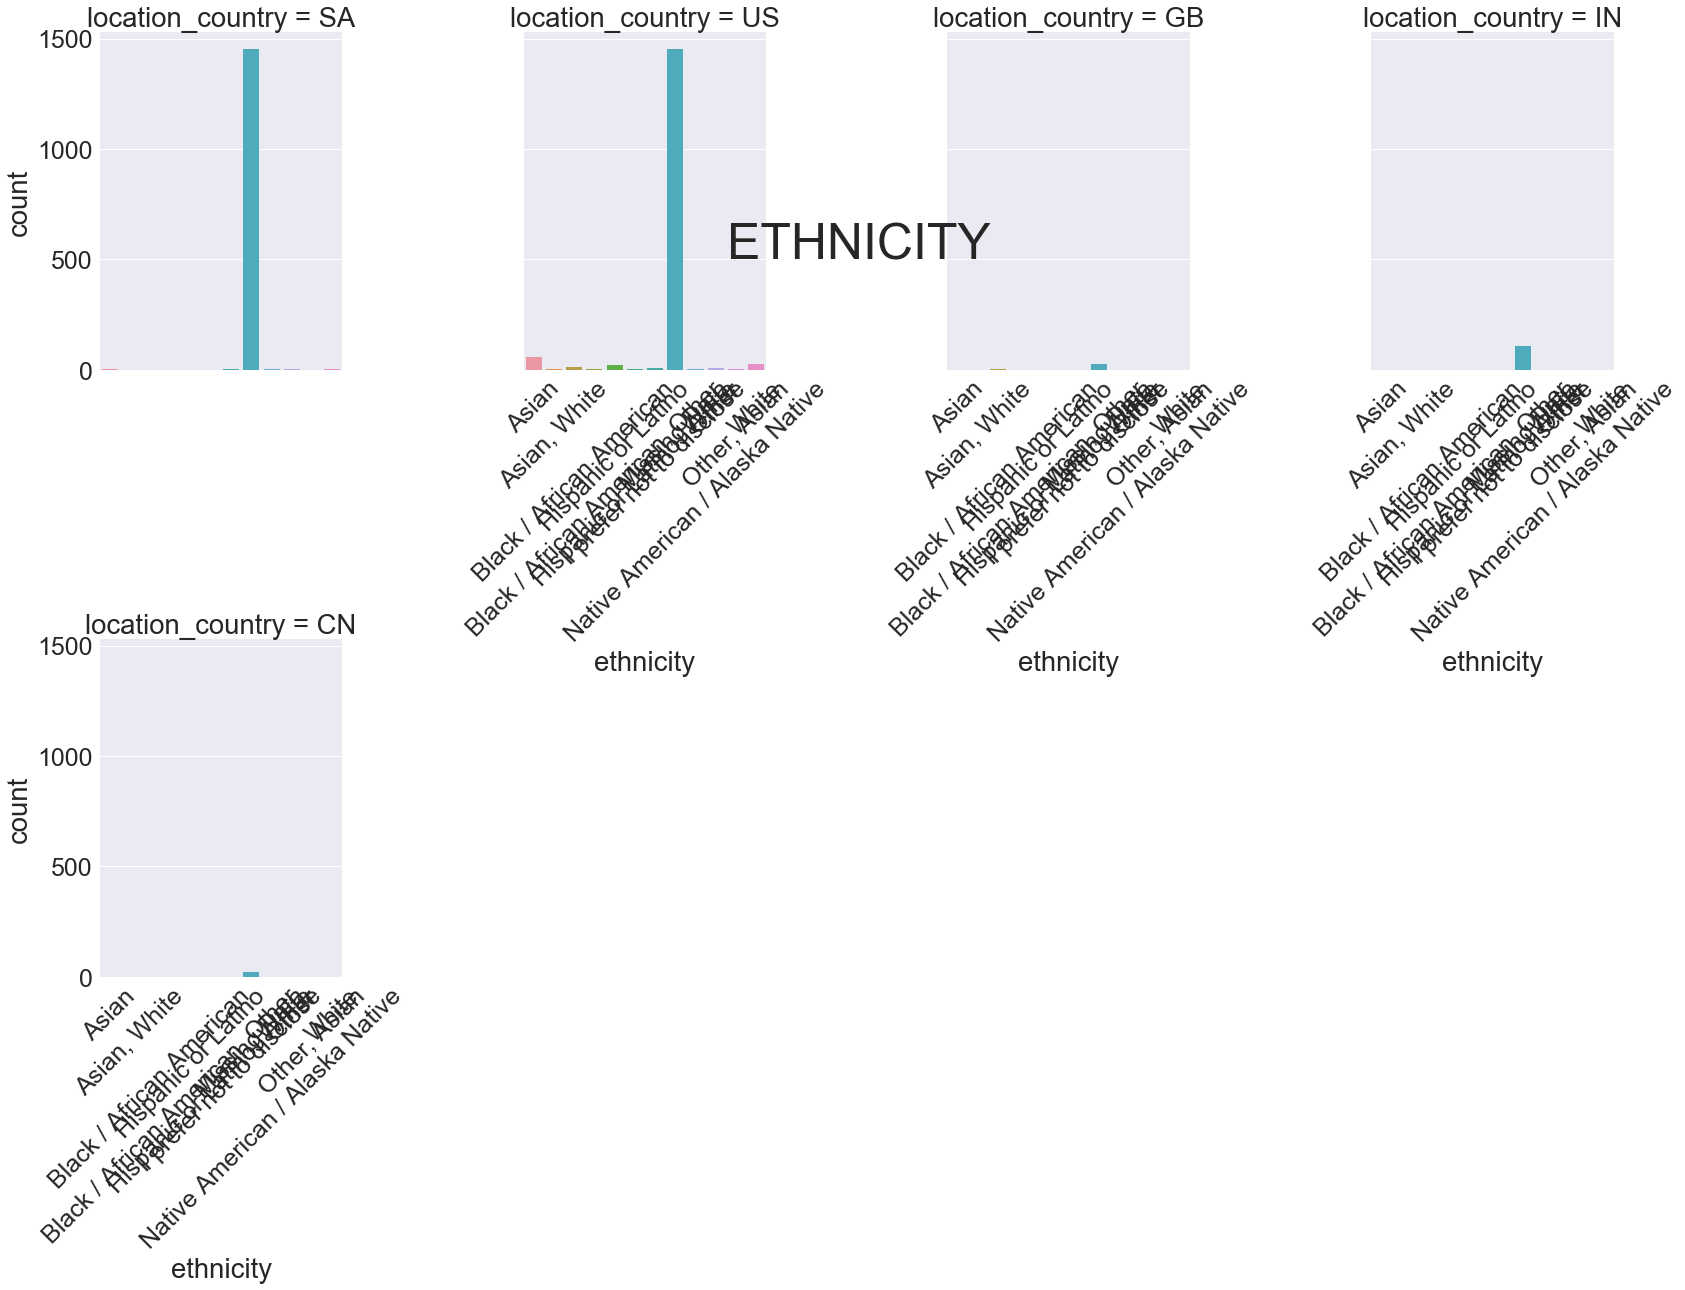

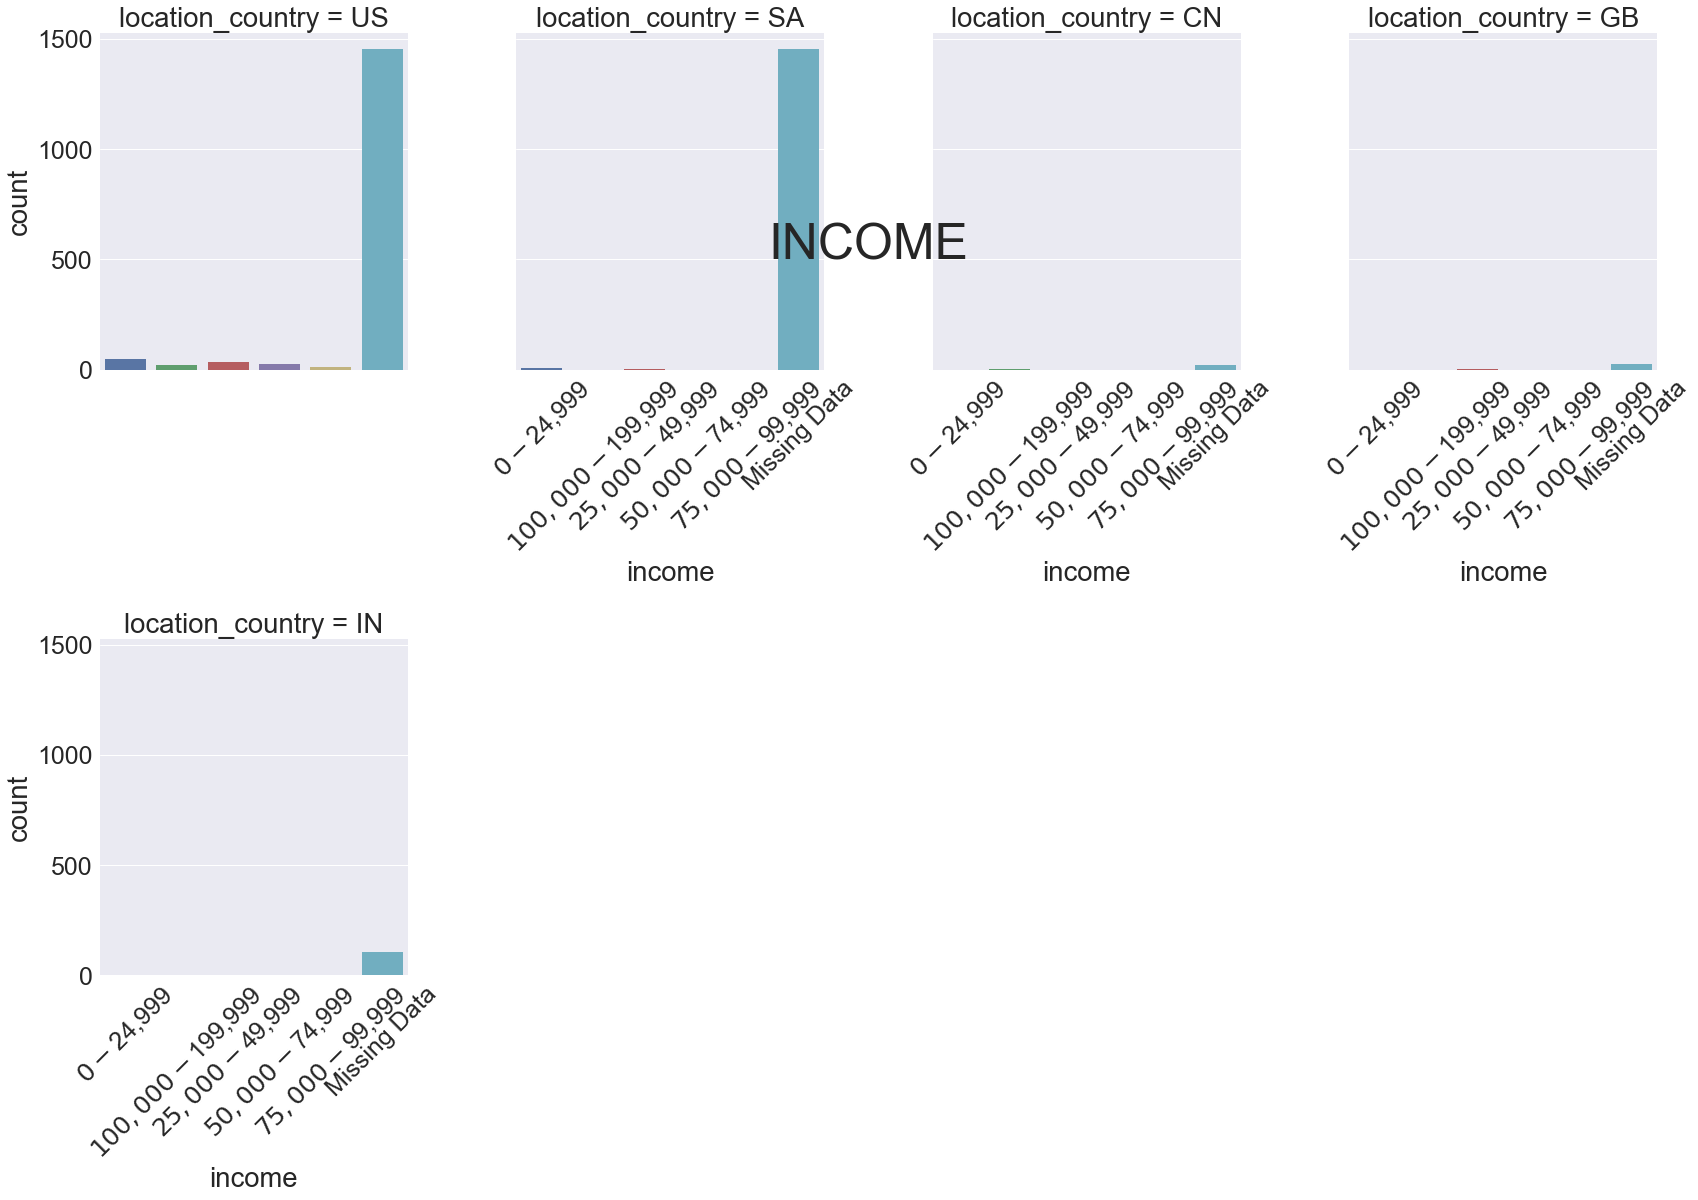

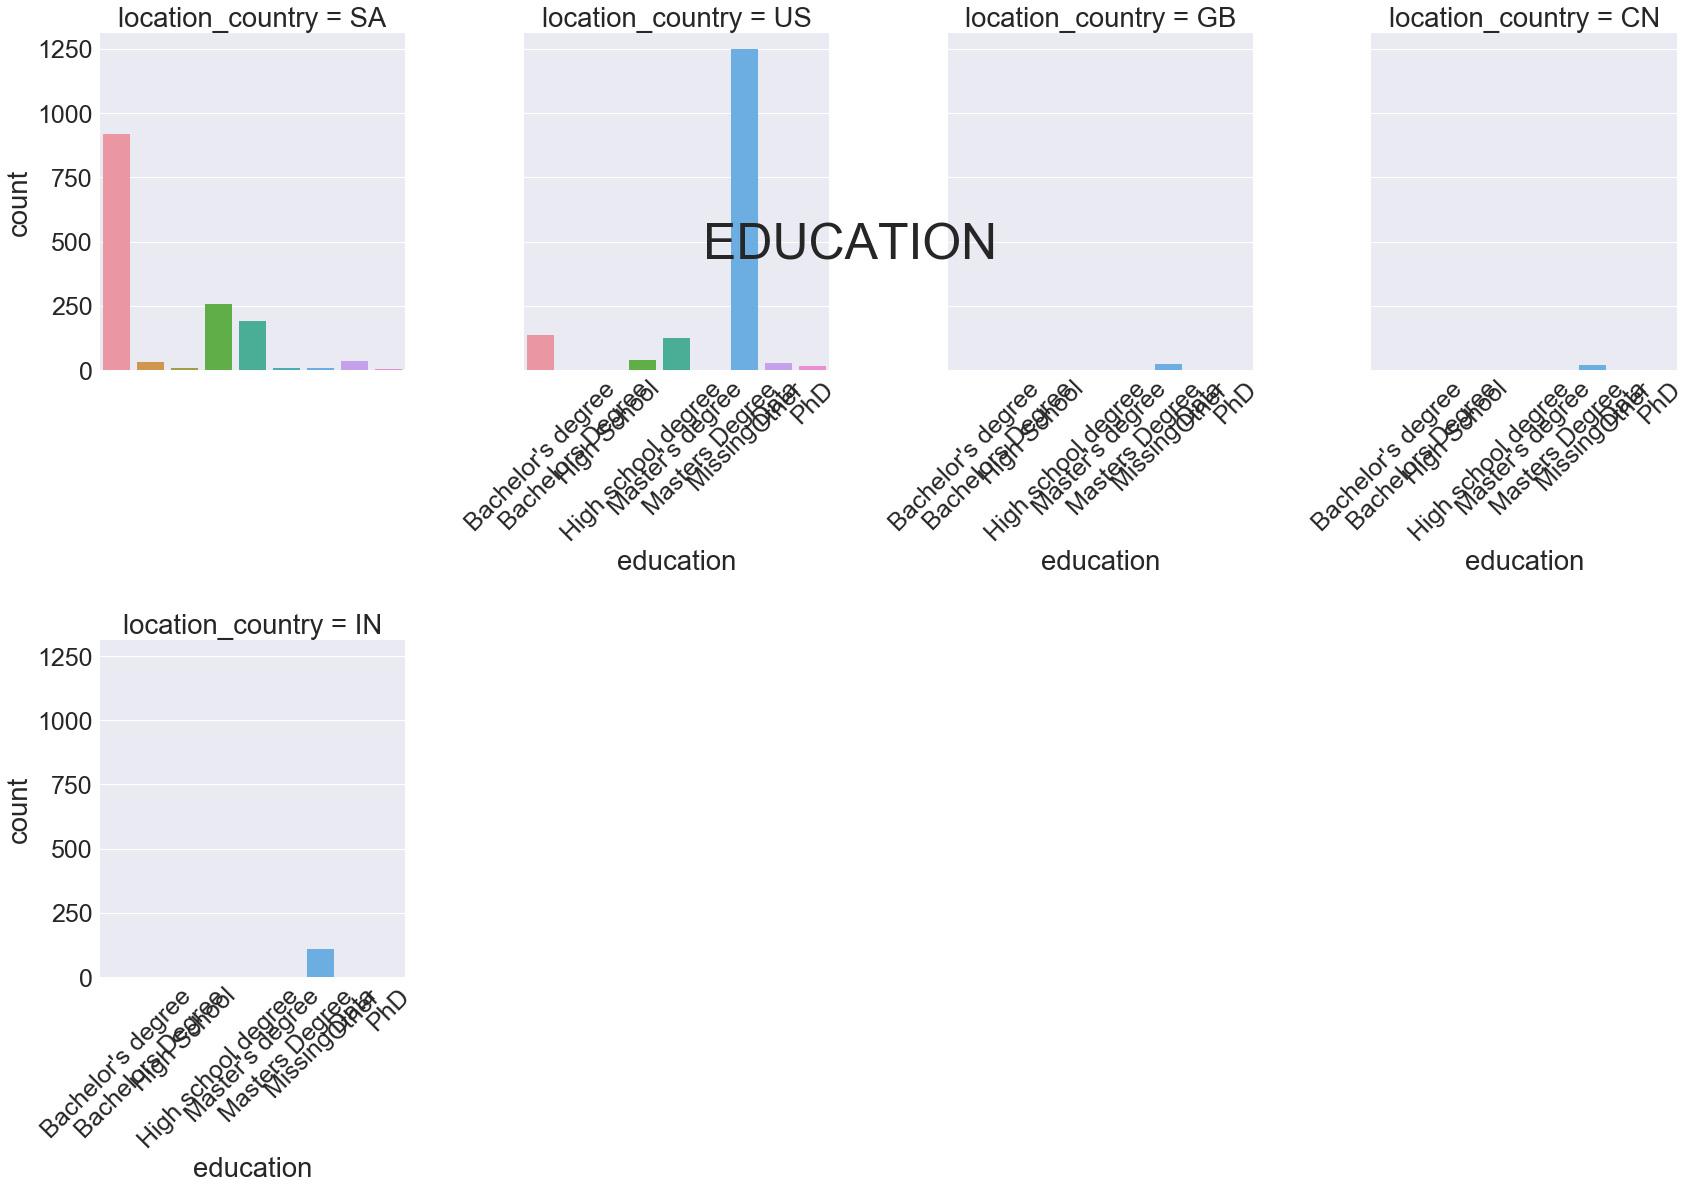

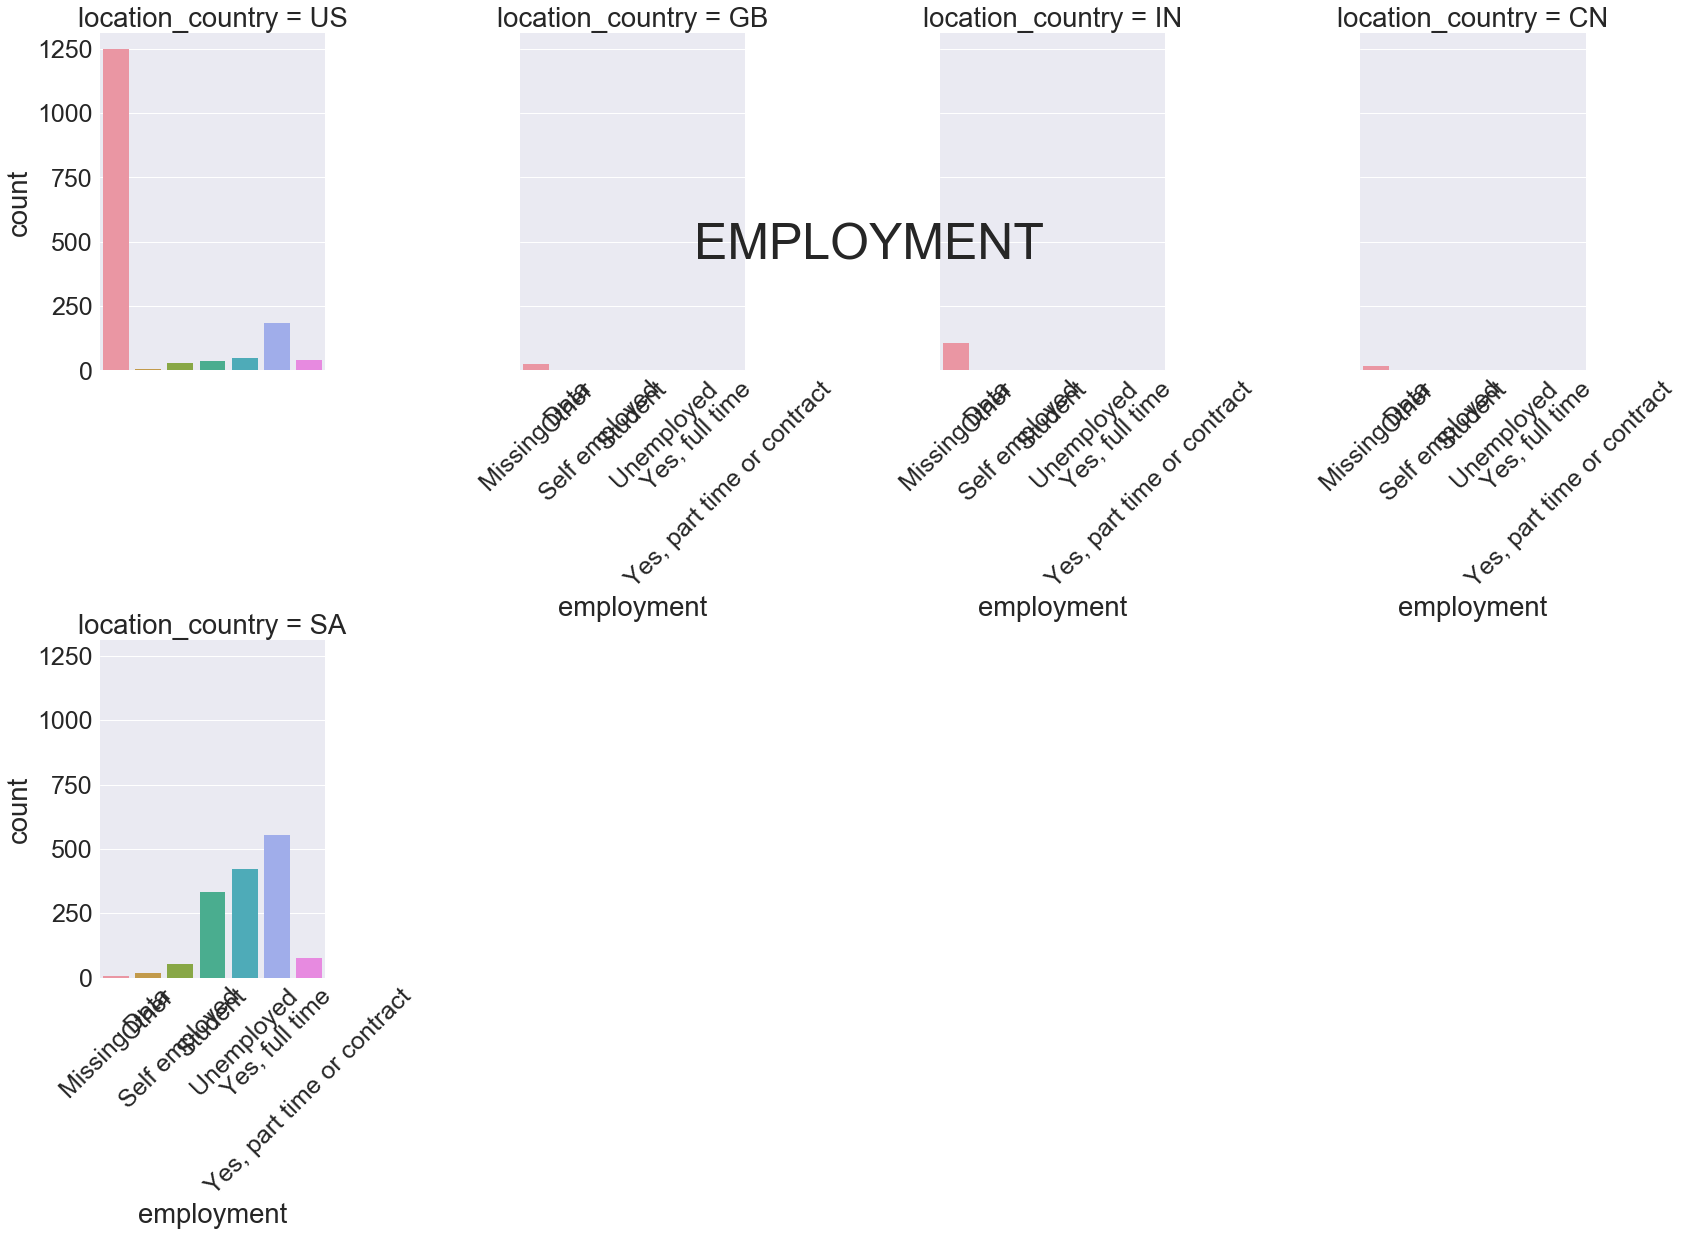

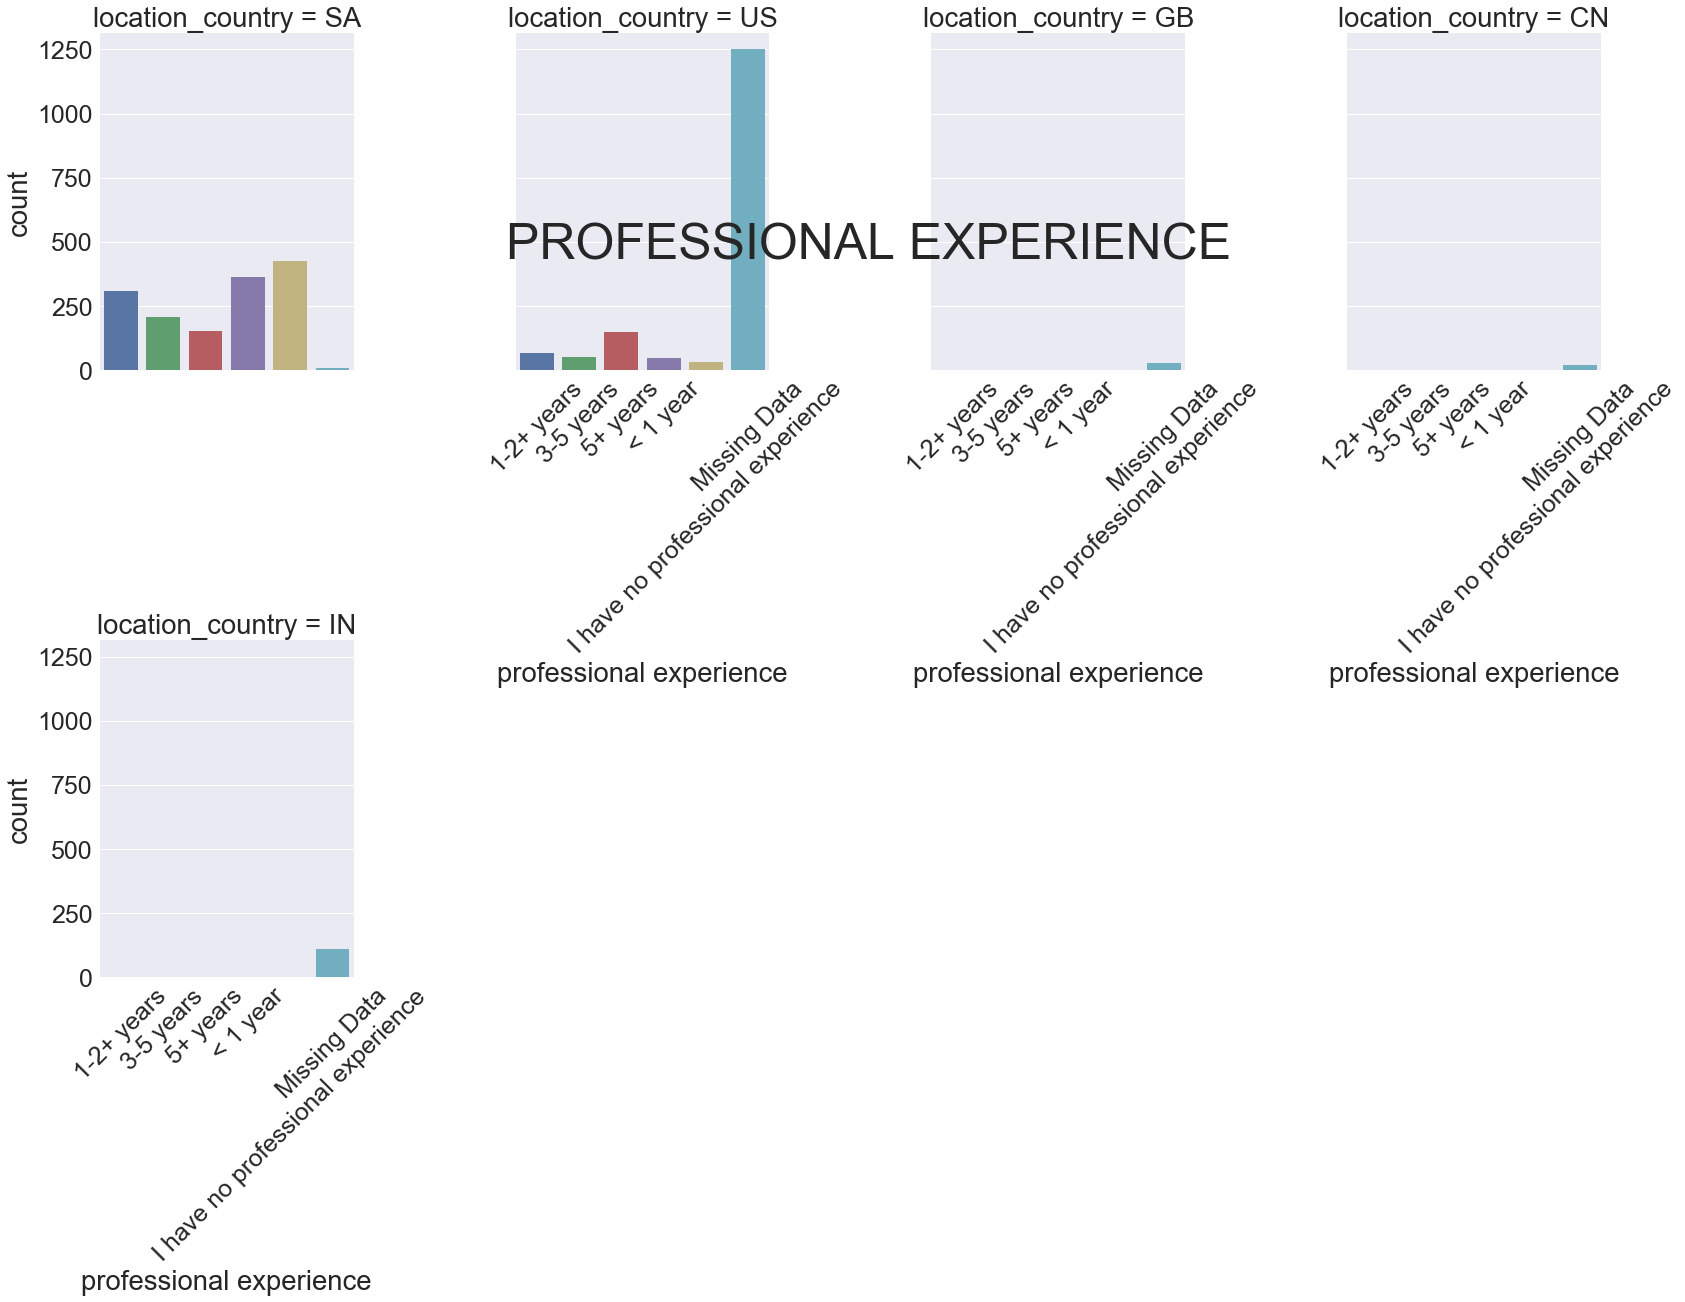

In [61]:
data.plot(by='location_country')#,exclude_missing_data=True)

## B2B vs. B2C vs. B2G by Age, Gender, Ethnicity, Income, Education, Employment and Professional Experience

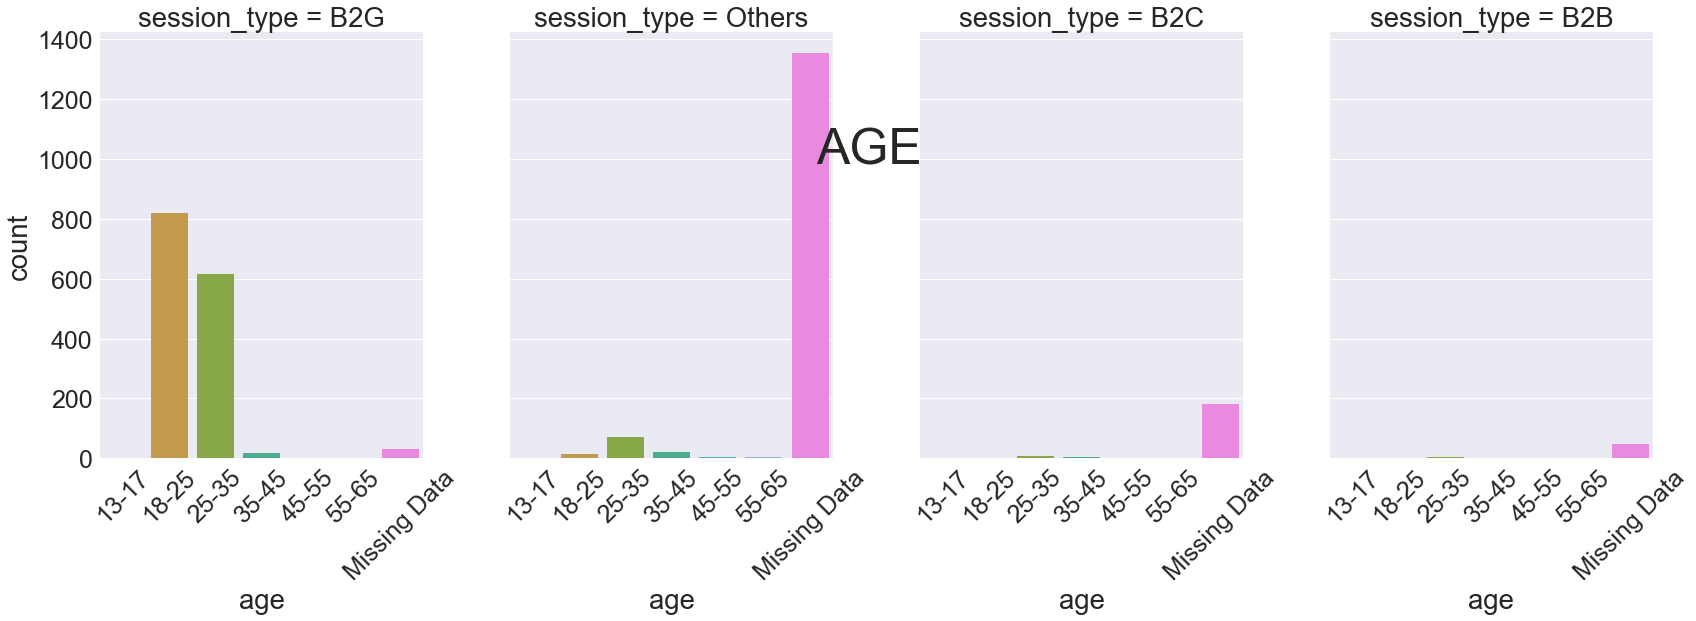

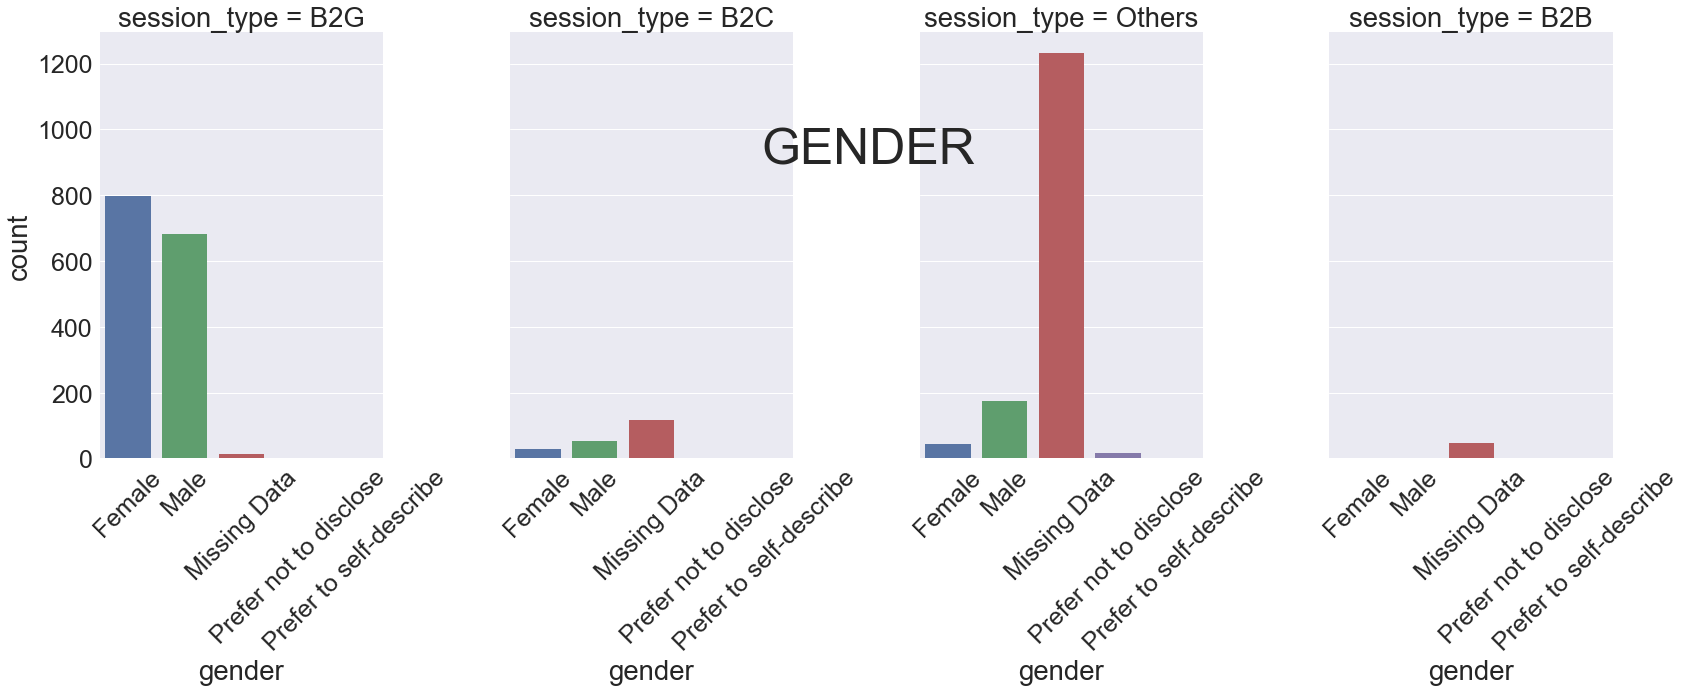

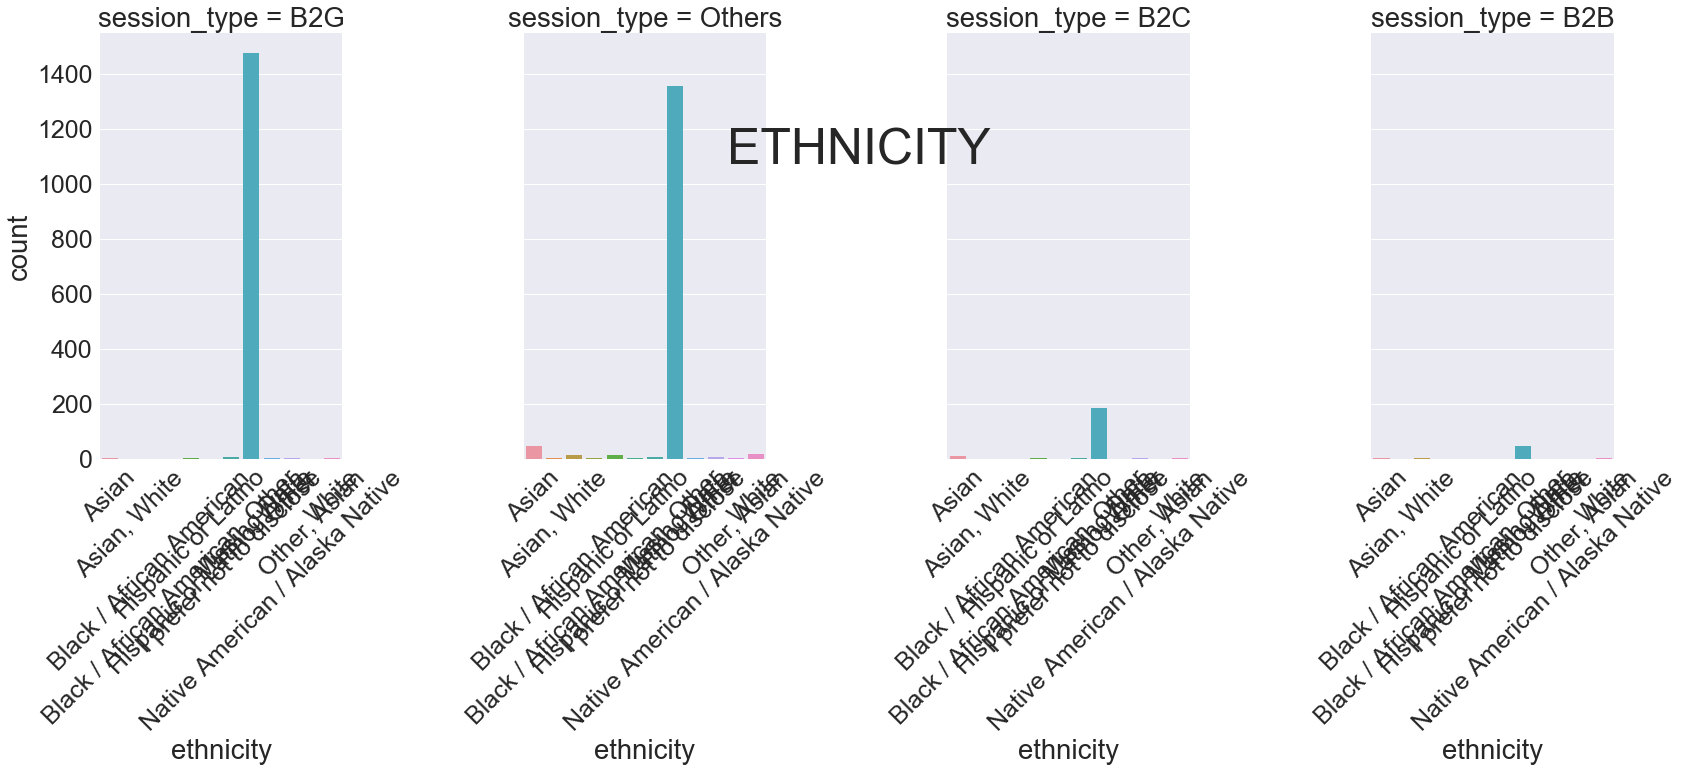

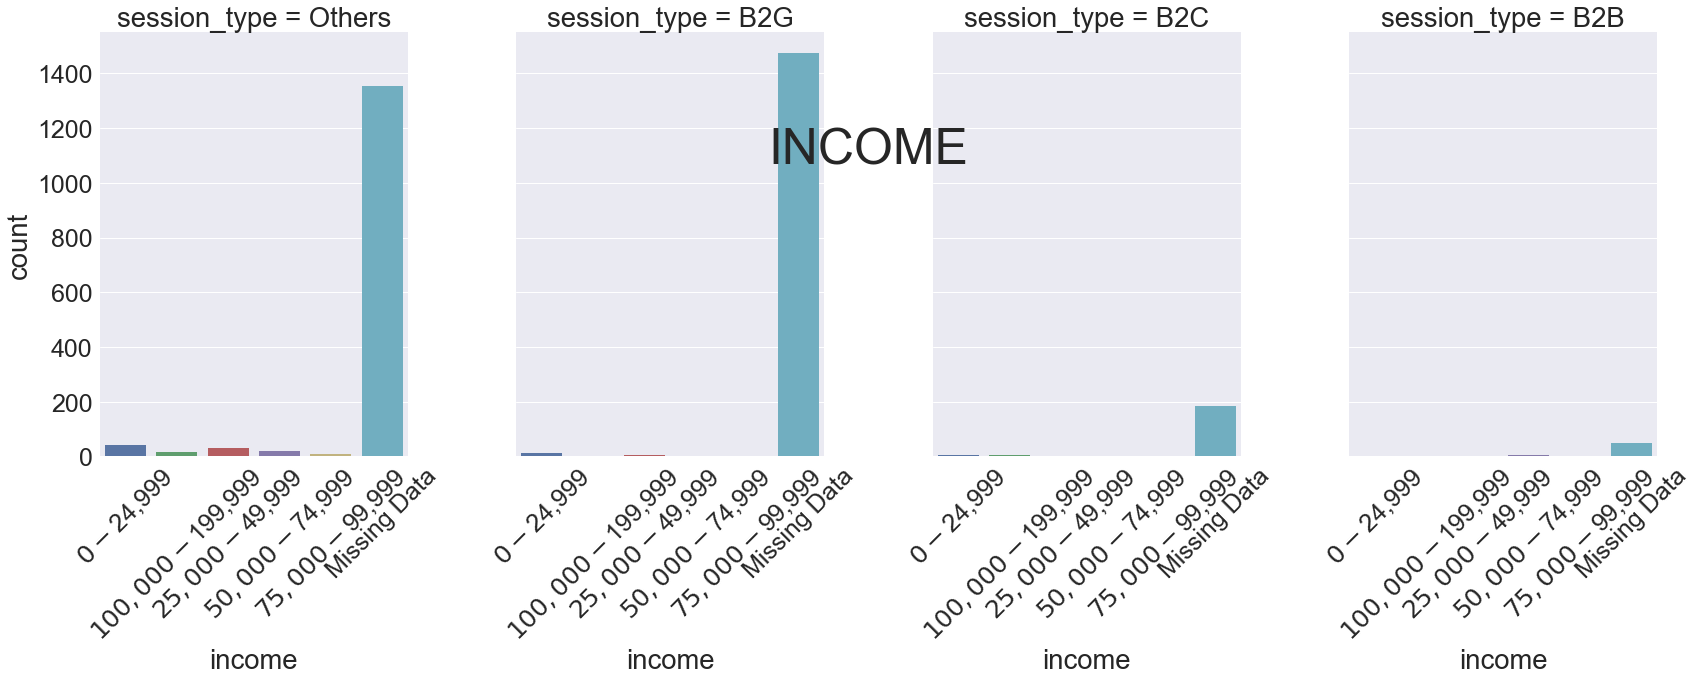

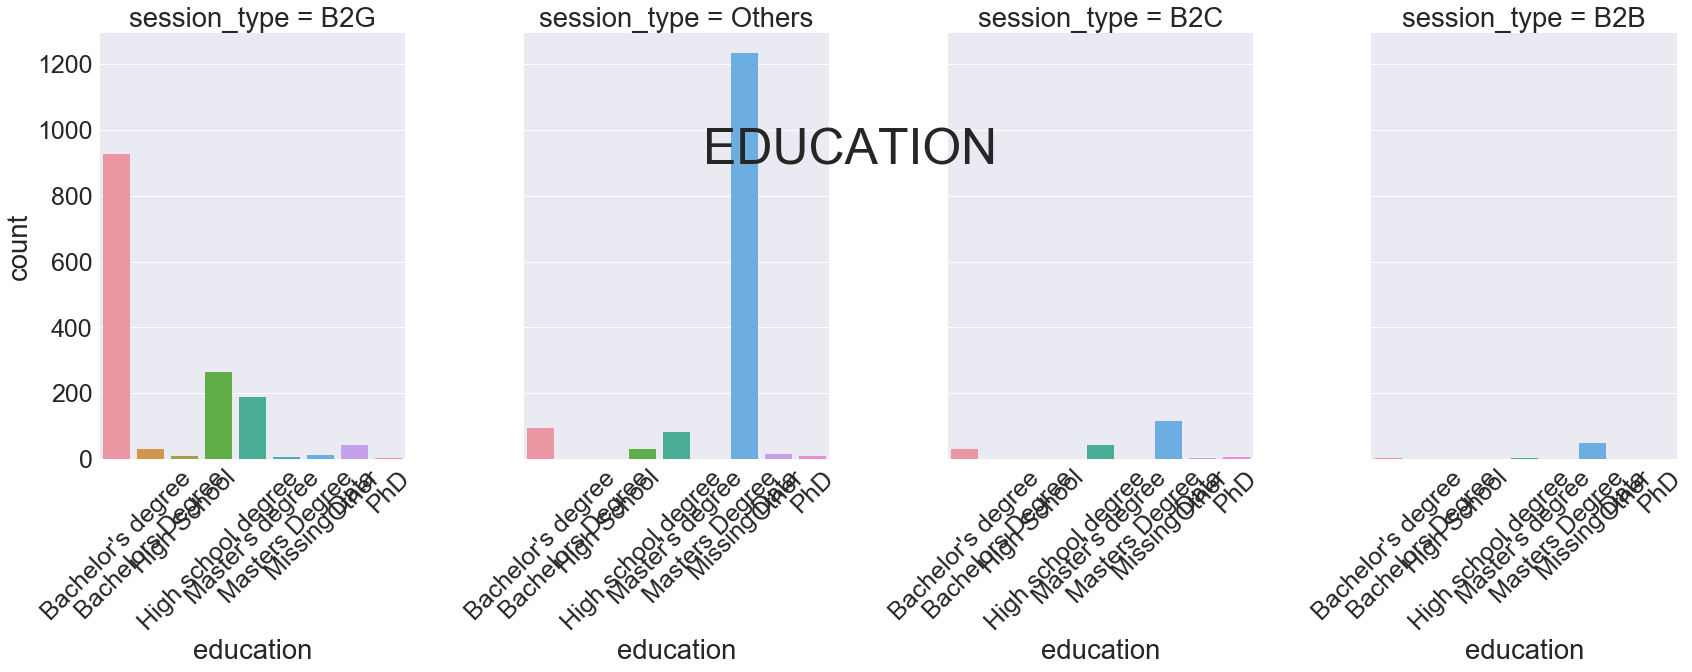

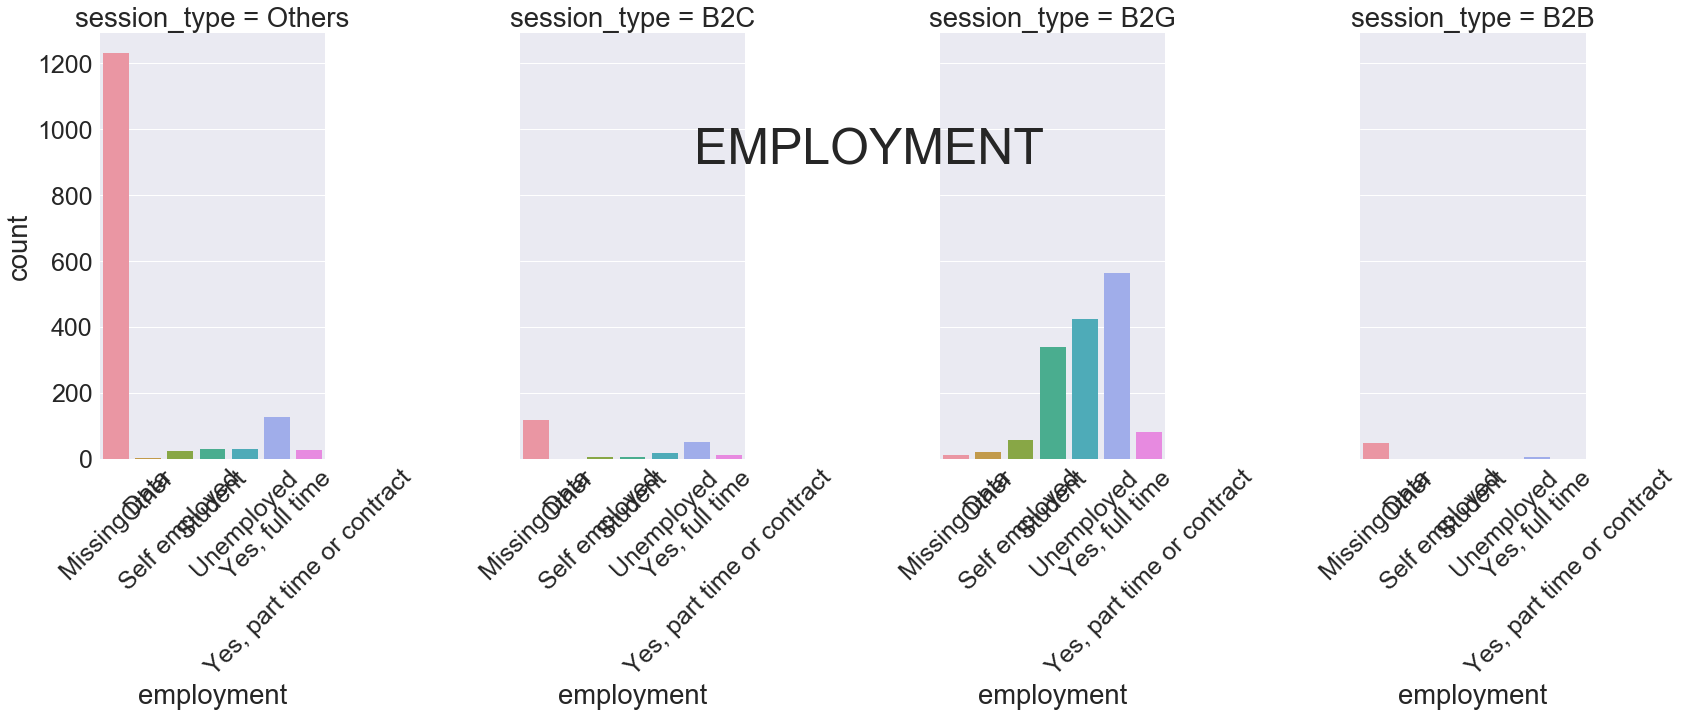

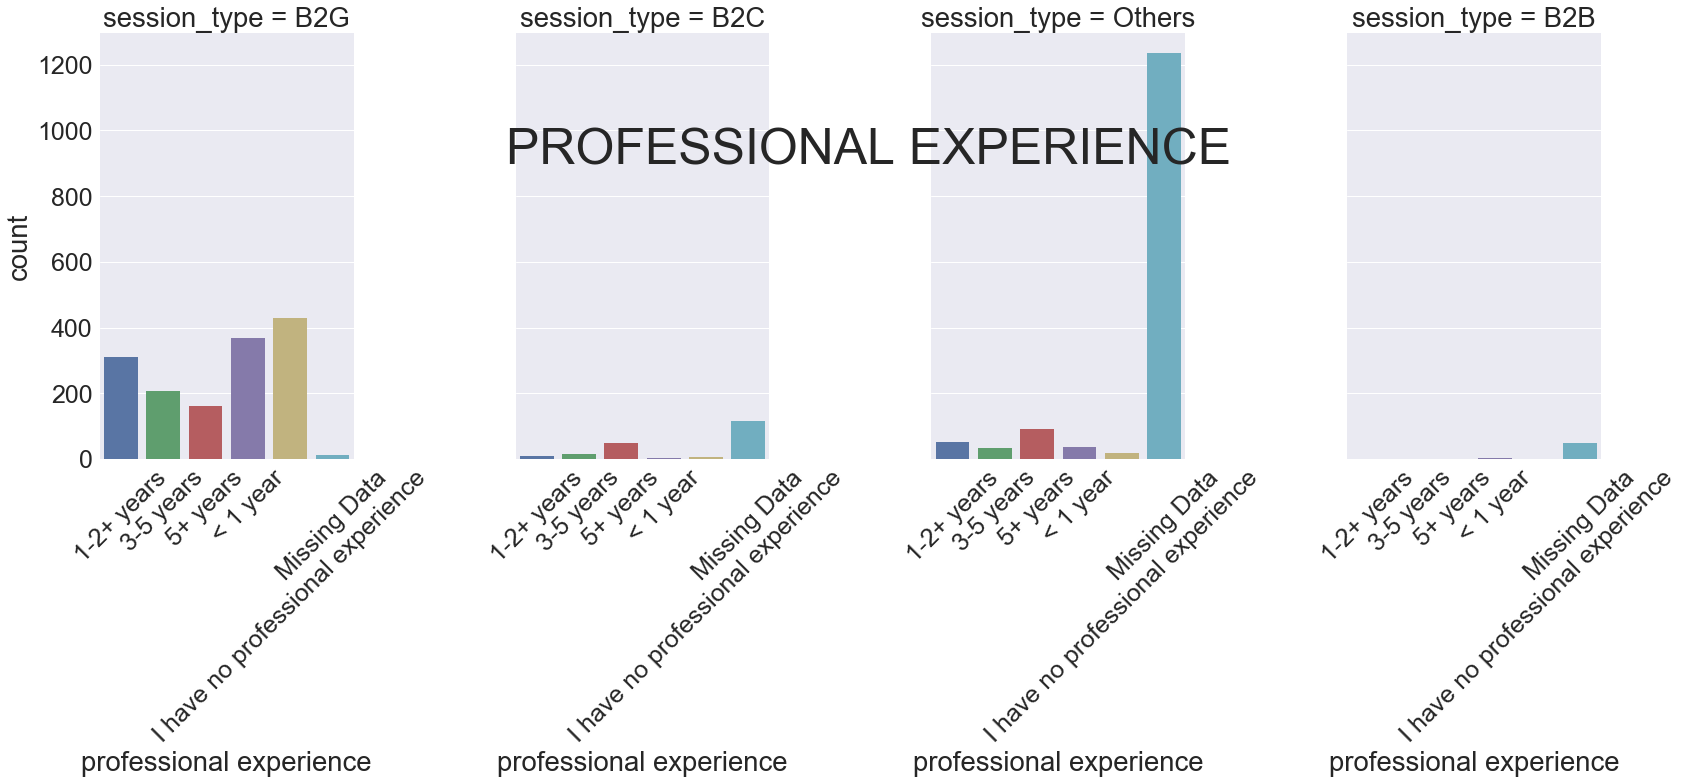

In [59]:
data.plot(by='session_type')#,exclude_missing_data=True)

### All (term + connect paid students)

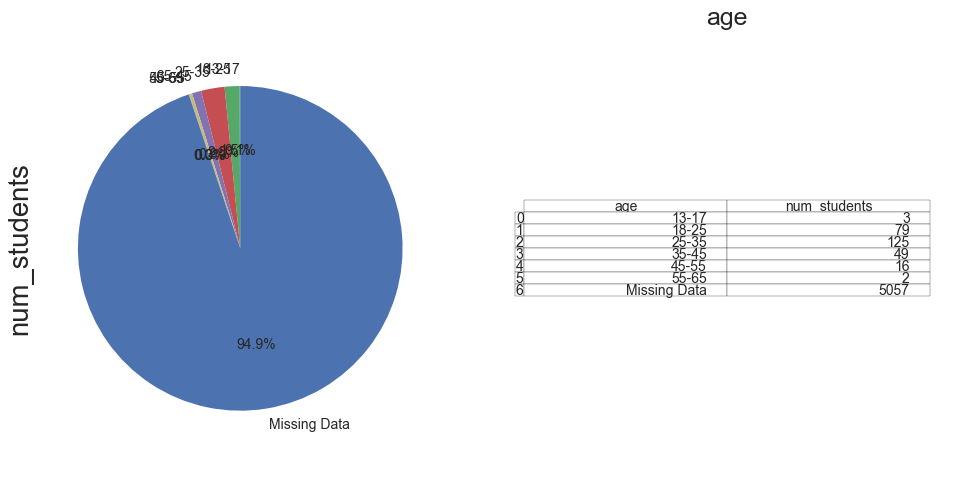

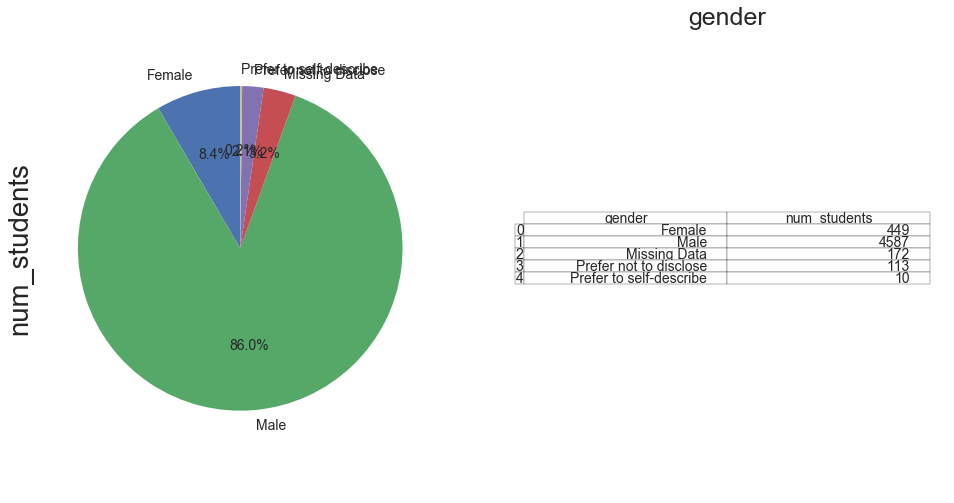

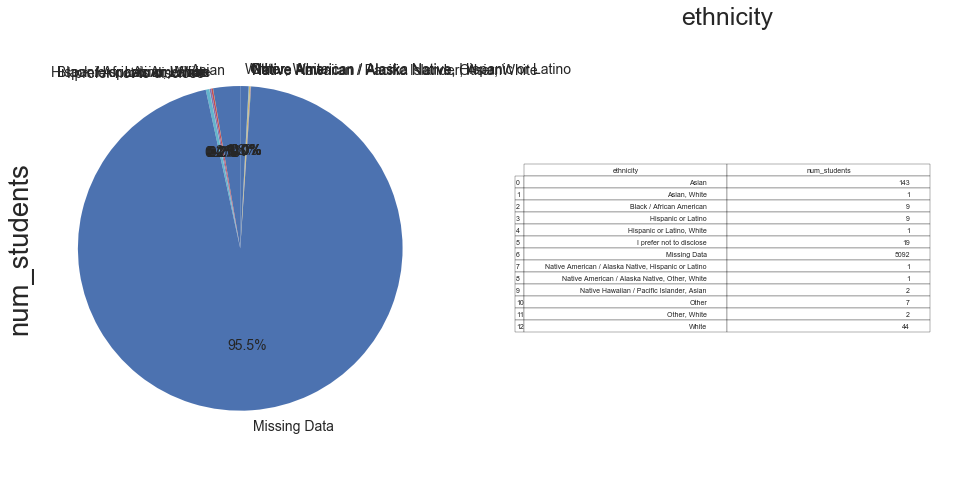

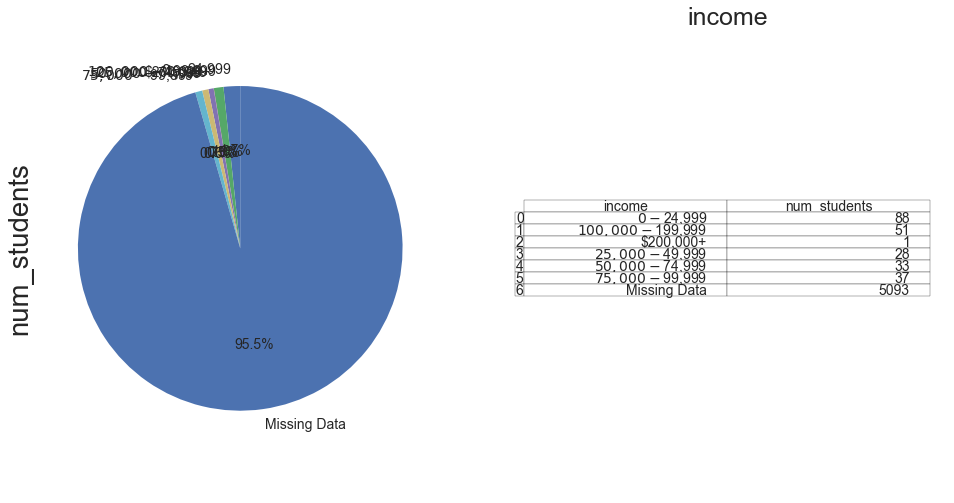

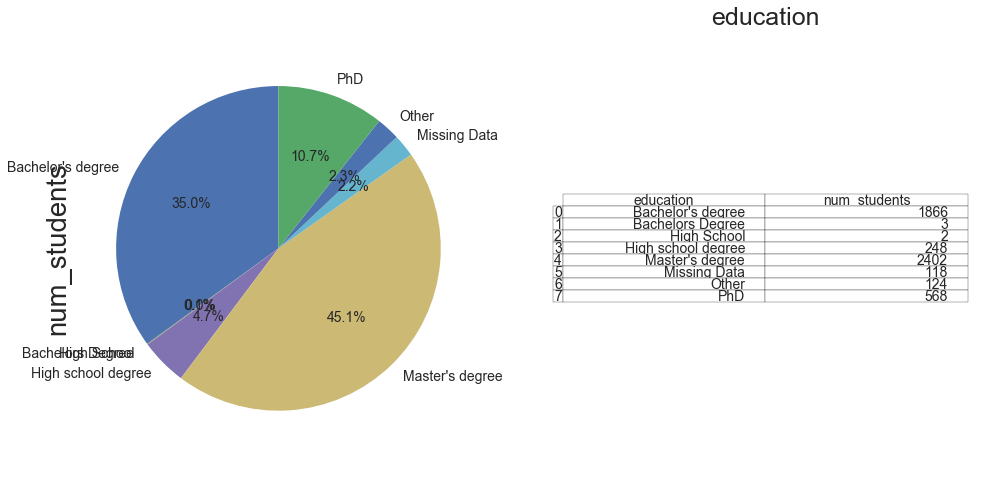

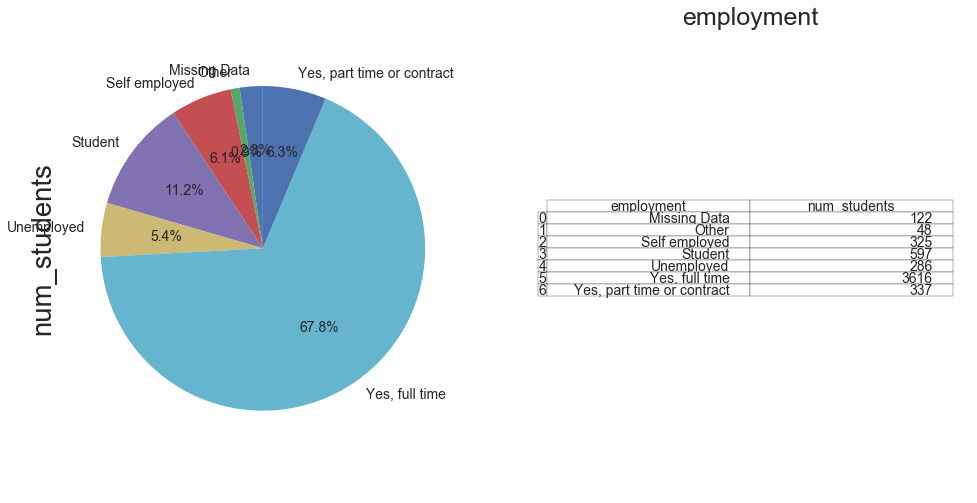

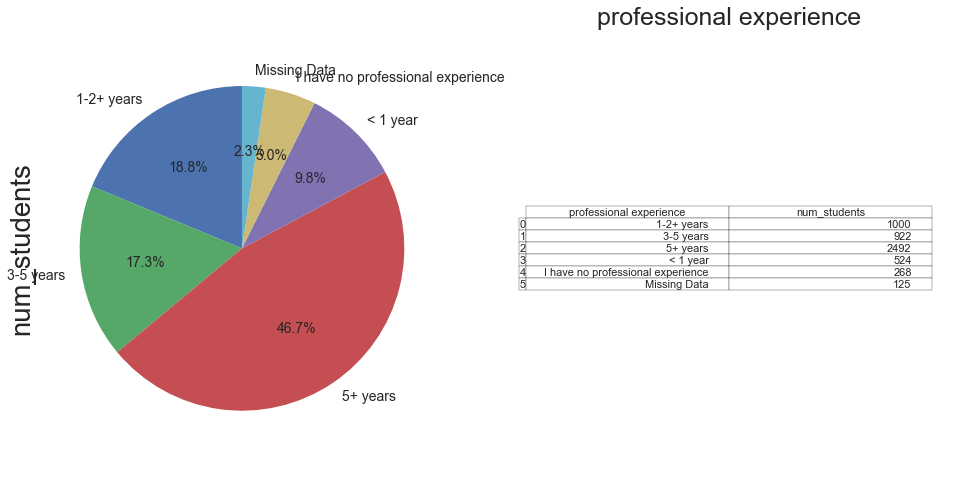

In [64]:
data_all.plot(by='all')

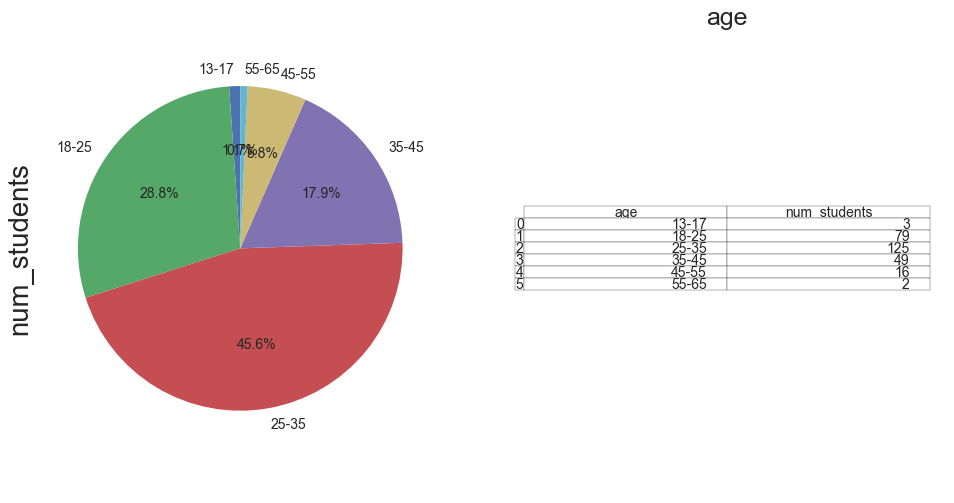

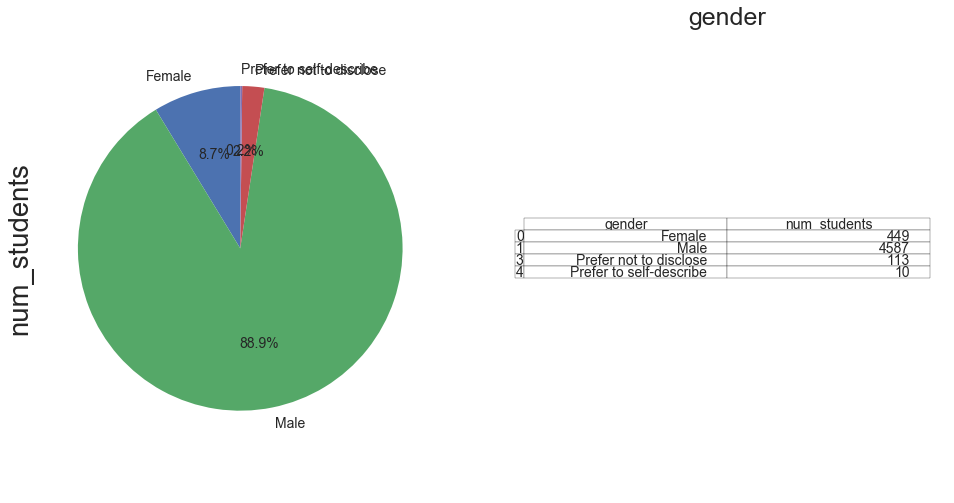

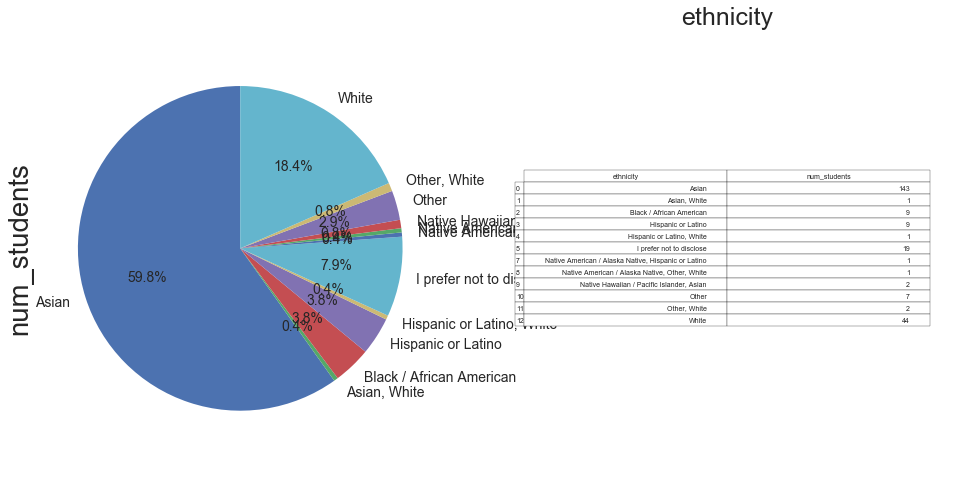

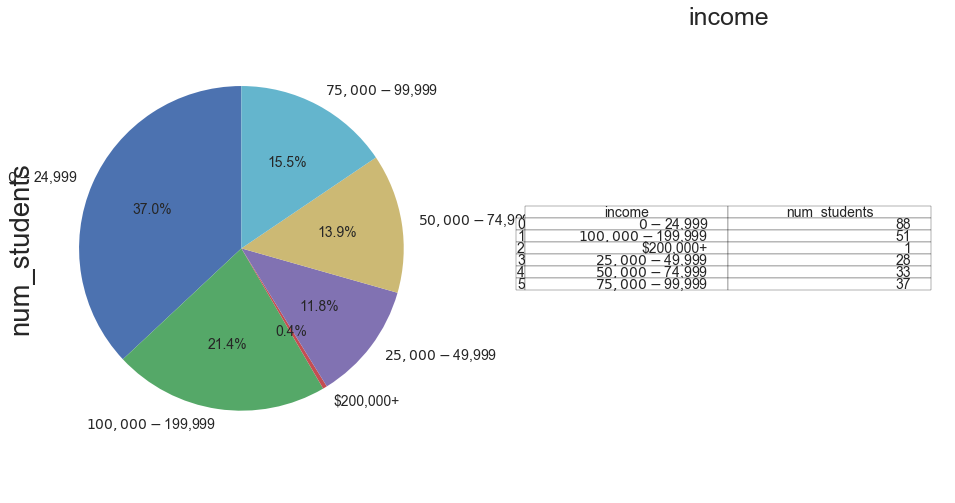

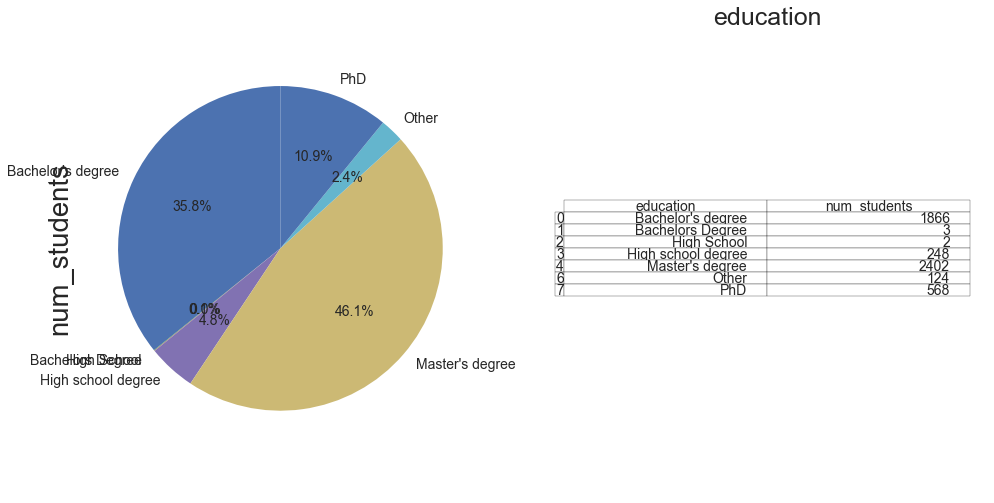

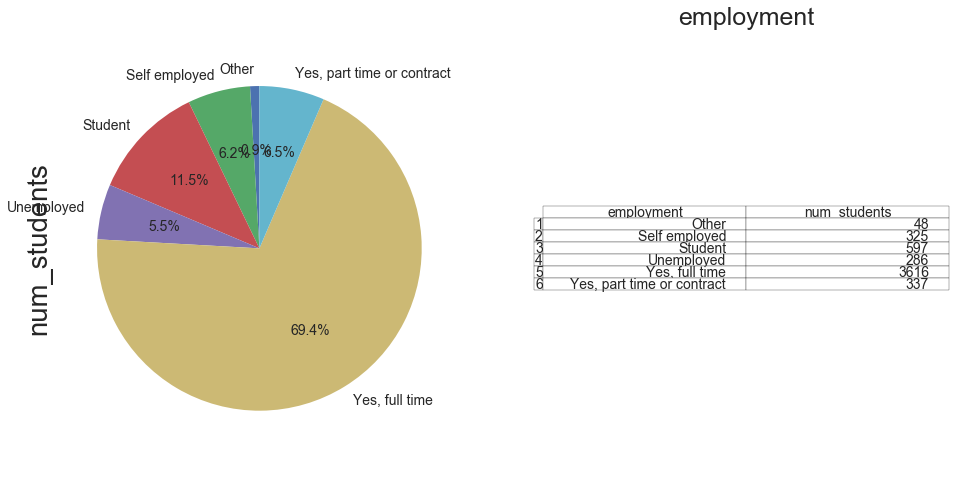

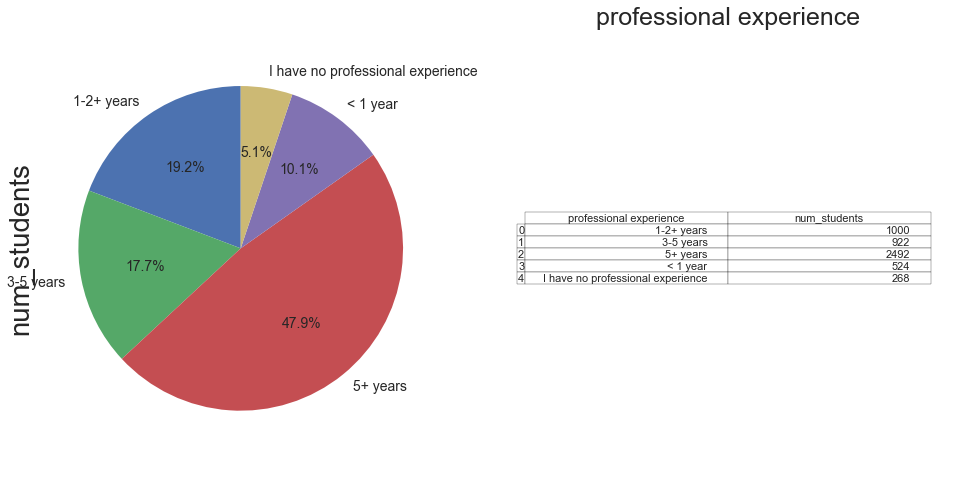

In [67]:
data_all.plot(by='all',exclude_missing_data=True)

### All (term + connect paid students) by application_type

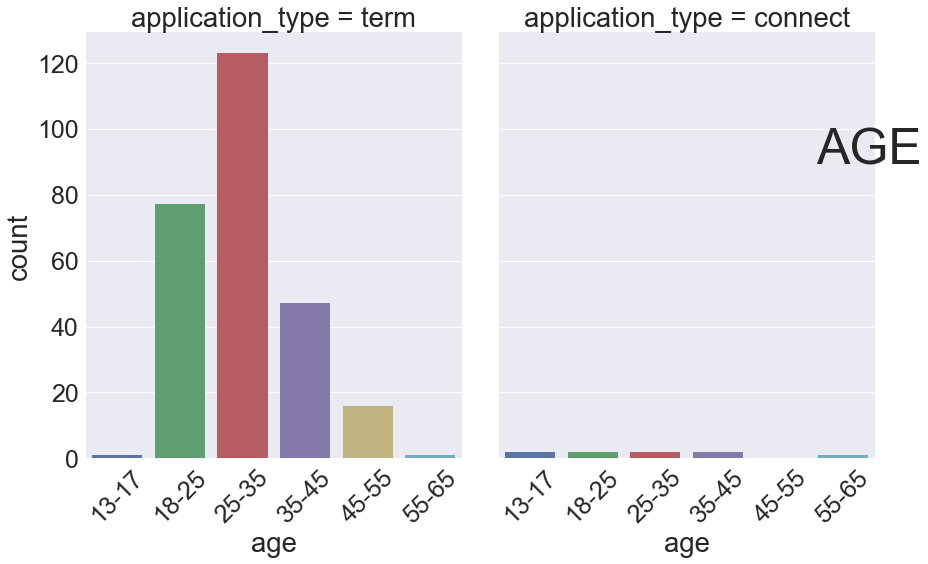

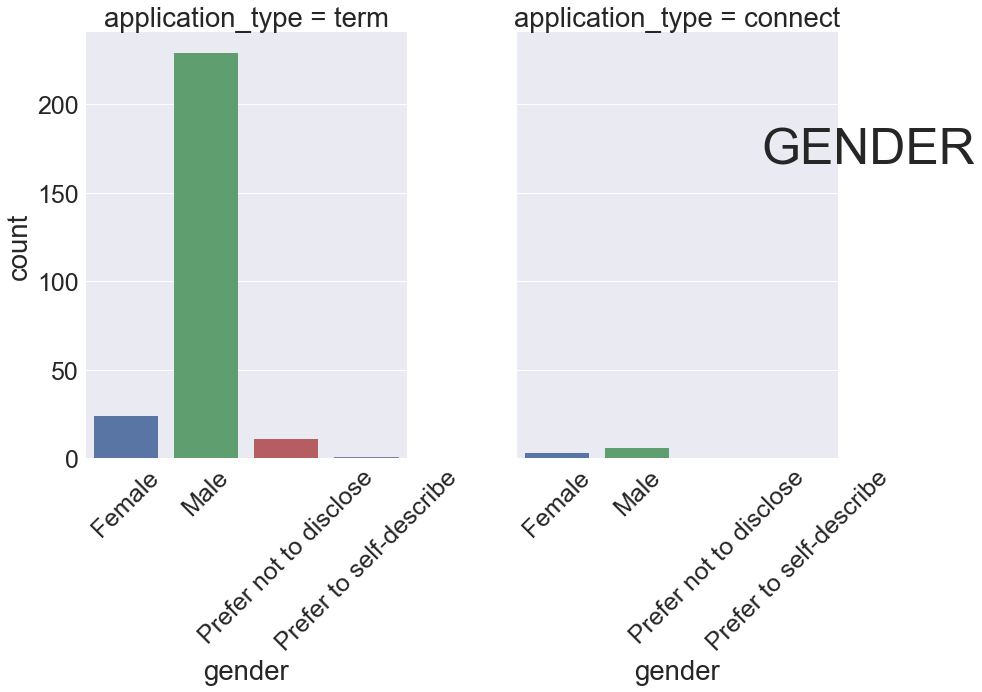

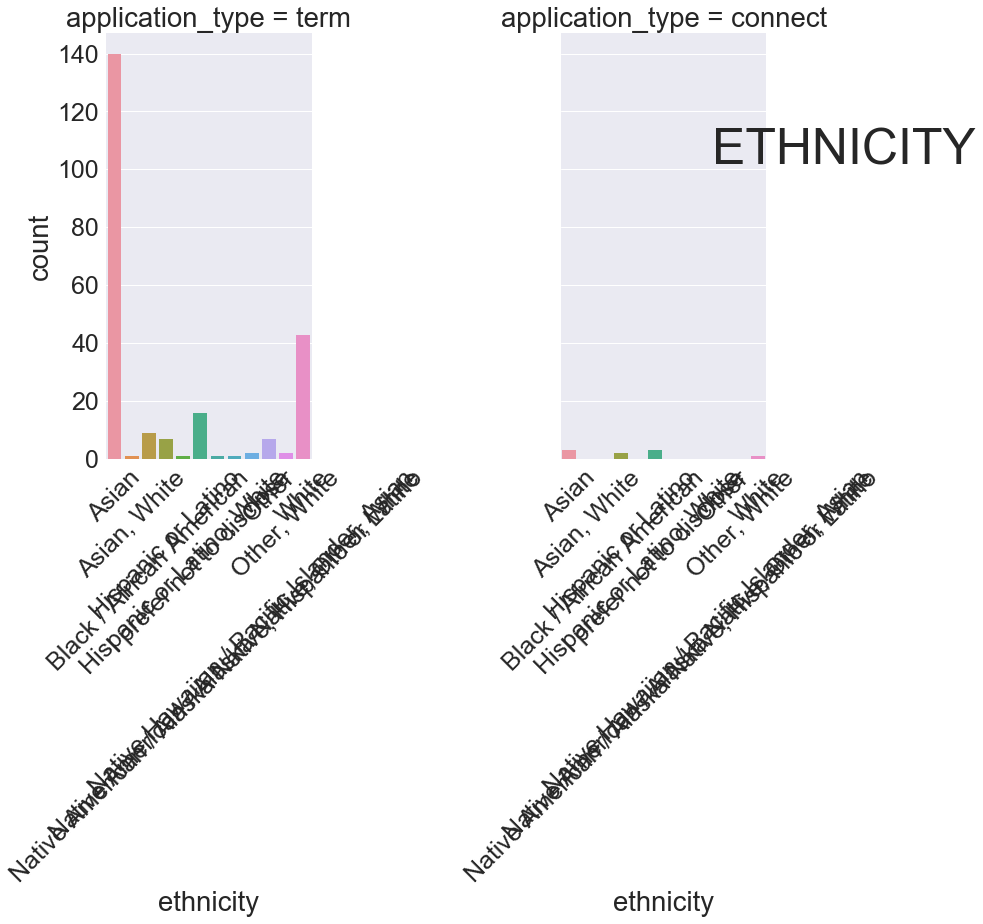

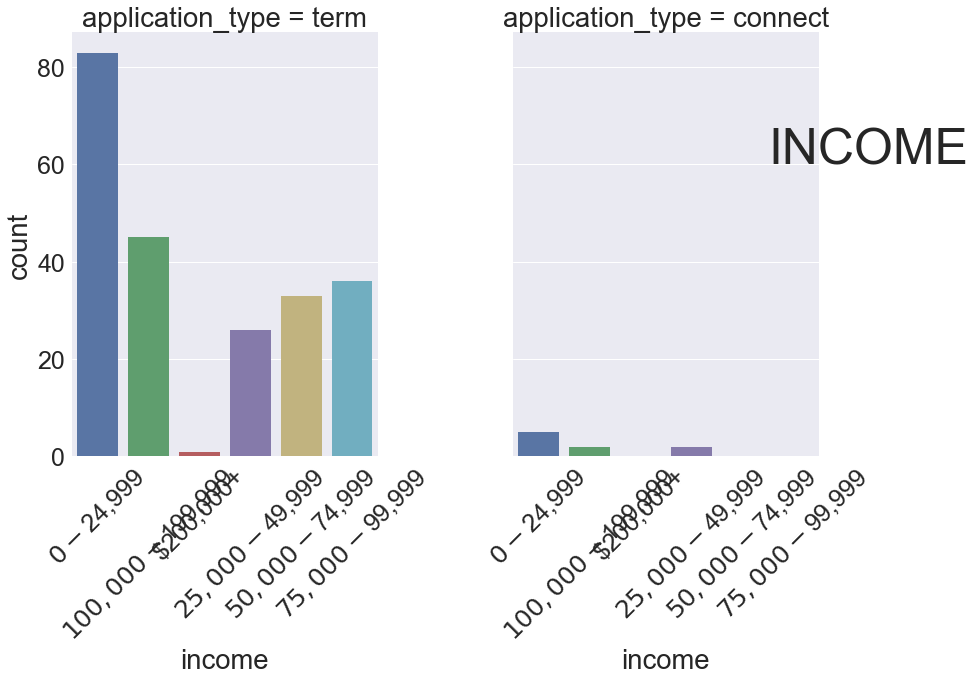

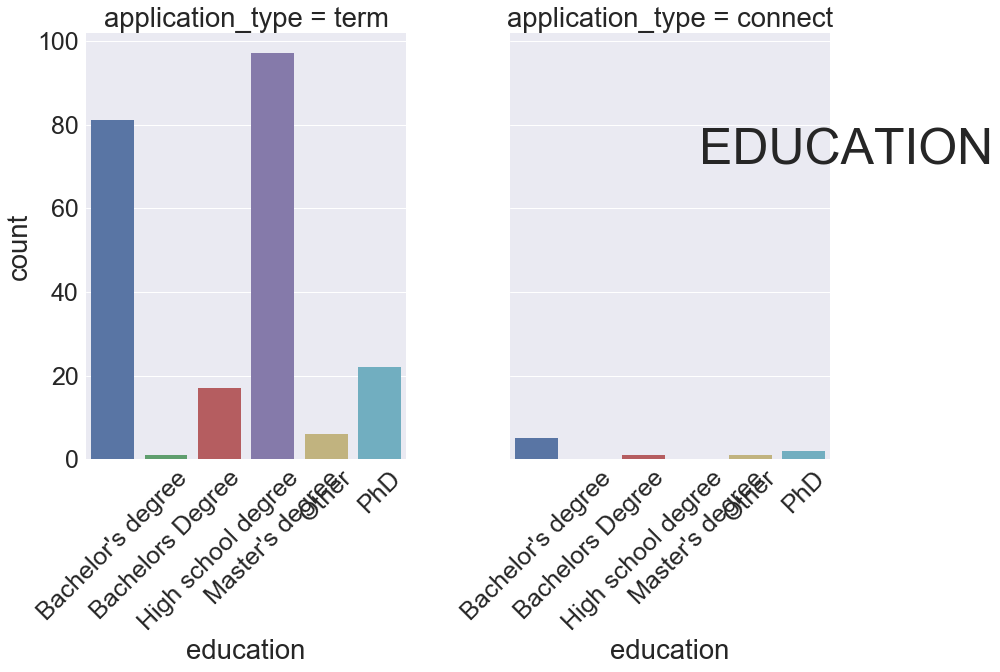

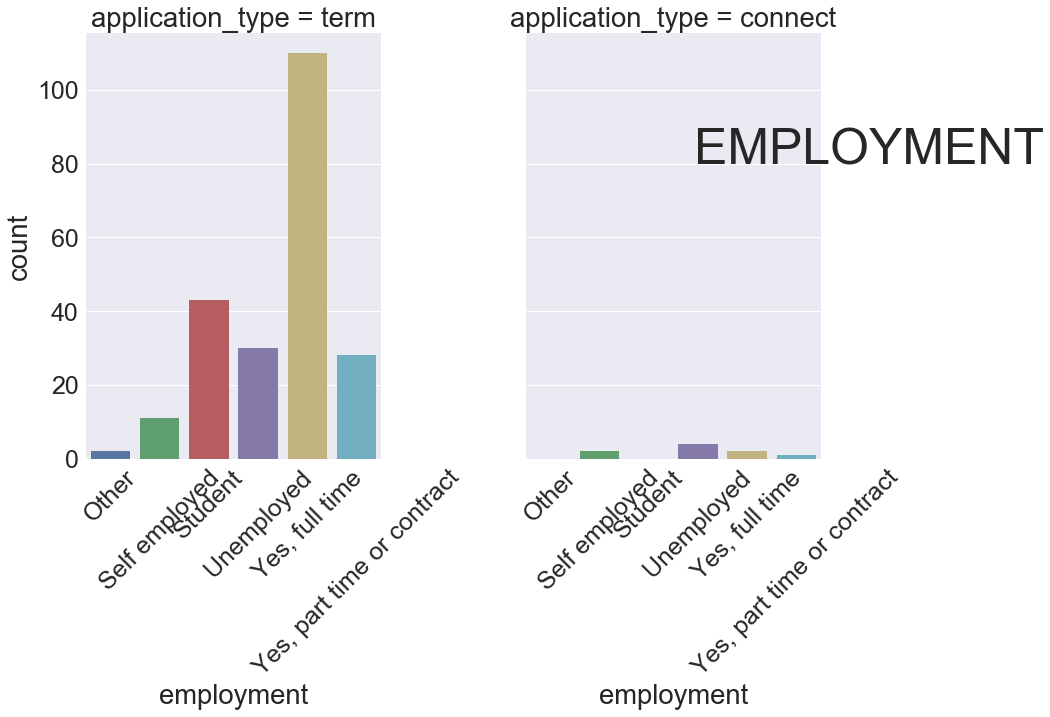

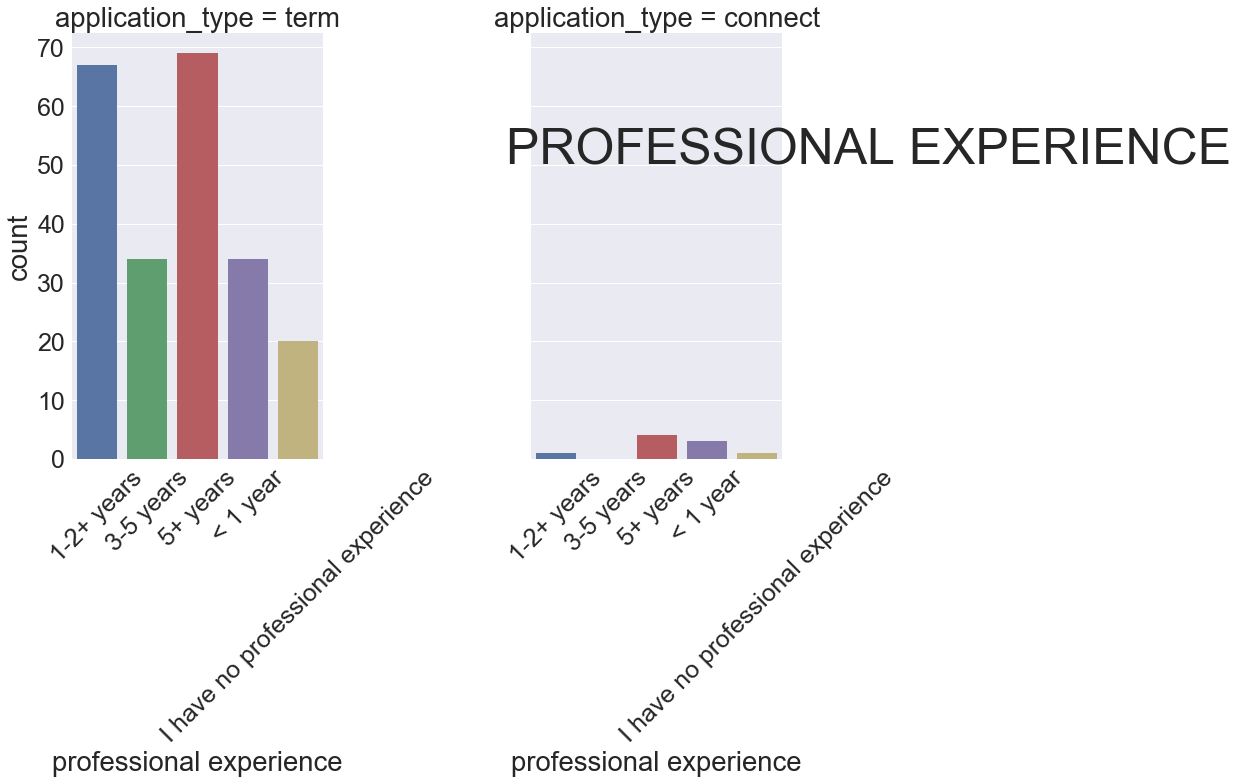

In [68]:
data_all.plot(by='application_type',exclude_missing_data=True) ## application_type : term; connect; scholarship

In [1]:
import psycopg2
import pandas as pd
import numpy as np
import datetime
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
conn_laurel = psycopg2.connect("dbname='analytics' user='analytics' host='analytics.cv90snkxh2gd.us-west-2.rds.amazonaws.com' password='!TgP$Ol9Z&6QhKW0tmn9mOW5rYT2J8'")

In [27]:
sql = """
WITH qr_id AS
  (SELECT distinct id
         ,CASE WHEN lower(prompt) like '%gender%' THEN 'gender'
               WHEN lower(prompt) like '%age%' THEN 'age'
               WHEN lower(prompt) like '%ethnicity%' THEN 'ethnicity'
               WHEN lower(prompt) like '%income%' THEN 'income'
               WHEN lower(prompt) like '%education%' THEN 'education'
               WHEN lower(prompt) like '%employed%' THEN 'employment'
               WHEN lower(prompt) like '%professional experience%' THEN 'professional experience'
          END AS category
   FROM admissions.questions
   WHERE category = 'demographics'
     AND (lower(prompt) like '%gender%' OR lower(prompt) like '%age%' OR lower(prompt) like '%ethnicity%' 
       OR lower(prompt) like '%income%' OR lower(prompt) like '%education%' OR lower(prompt) like '%employed%'
       OR lower(prompt) like '%professional experience%')
  ),

students AS
  (SELECT distinct a.session_id,a.session_product_type,a.degree,a.account_key,a.location_country,a.location_state,a.location_name,b.id,b.category
   FROM uconnect_enrollments a,qr_id b
  ),

students2 AS
  (SELECT distinct a.*
         ---,b.affiliate_key,b.variant,case when b.variant is not null then 'B2B' else 'B2C' end AS student_category
        ,case when a.session_id in ('56','57','58','59','60','69','70','71','83','82') then 'B2C'
              when a.session_id in ('63','64') then 'B2B'
              when a.session_id in ('89','92','90','93','94','108','109','95','96','97','110','111','100','101','102','112','113','114','91','98','99','118','119','103','104','105','106','107','115','116','117','120','121','61','66','67','68','73','74','75','76','77','78','79','80','81') then 'B2G'
         else 'Others' end AS session_type
   FROM students a
   ---LEFT JOIN affiliates.affiliate_deployments b on a.account_key = b.account_key and left(a.degree,5) = left(b.nd_key,5)
   ---INNER JOIN accounts c ON a.account_key = c.account_key AND c.email NOT LIKE '%@udacity%'
  )

SELECT a.session_id,a.degree,a.location_country,a.location_state,a.location_name
      ,a.account_key,a.session_type,a.category,a.id,c.response,c.response_updated_at
      ,row_number() OVER (PARTITION BY a.account_key,a.session_id,a.category ORDER BY coalesce(c.response_updated_at::date,'1900-01-01') DESC) AS row_num
FROM students2 a
LEFT JOIN applications b on a.account_key = b.applicant_id--- and left(a.degree,5) = left(b.nd_key,5)
LEFT JOIN admissions.question_responses c ON b.id = c.application_id and c.question_id = a.id
---LEFT JOIN test_yidong.connect_question_responses c ON a.account_key = c.applicant_id and c.question_id = a.id
  AND (c.response IS NOT NULL OR c.response != '')
;
"""

In [30]:
df = pd.read_sql(sql,conn_laurel)

In [51]:
class demographics:
    
    def __init__(self,data):
        
        self.data = data
        self.process_data = self.process_data()
    
    def process_data(self):
        
        df = self.data
        
        df = df[df['row_num']==1]
        df['response'] = ['Missing Data' if not x else x for x in df['response']]
        demographics = pd.pivot_table(df, values='response', index=['account_key'],columns=['category'],aggfunc=np.max).reset_index()
        data = df[['location_country','account_key','session_type']]
        data = pd.merge(data,demographics,on='account_key',how='left').drop_duplicates()
        
        def text2int(textnum, numwords={}):
            if not numwords:
              units = [
                "zero", "one", "two", "three", "four", "five", "six", "seven", "eight",
                "nine", "ten", "eleven", "twelve", "thirteen", "fourteen", "fifteen",
                "sixteen", "seventeen", "eighteen", "nineteen",
              ]

              tens = ["", "", "twenty", "thirty", "forty", "fifty", "sixty", "seventy", "eighty", "ninety"]

              scales = ["hundred", "thousand", "million", "billion", "trillion"]

              numwords["and"] = (1, 0)
              for idx, word in enumerate(units):    numwords[word] = (1, idx)
              for idx, word in enumerate(tens):     numwords[word] = (1, idx * 10)
              for idx, word in enumerate(scales):   numwords[word] = (10 ** (idx * 3 or 2), 0)

            current = result = 0
            for word in textnum.split():
                if word.lower() not in numwords:
                  raise Exception("Illegal word: " + word)

                scale, increment = numwords[word.lower()]
                current = current * scale + increment
                if scale > 100:
                    result += current
                    current = 0

            return result + current

        def age_process(df):
            for val in pd.Series(df.age):
                if '/' in val:
                    age = datetime.date.today().year - int(re.findall(r"[0-9]{4}",val)[0]) + 1
                    return str(age)
                elif re.match(r"[0-9]{4}",val):
                    age = datetime.date.today().year - int(re.findall(r"[0-9]{4}",val)[0]) + 1
                    return str(age)
                #elif re.match(r"[0-9]{2}",val):
                    #return int(re.findall(r"[0-9]{2}",val)[0])
                elif ('year' in val) | ('old' in val):
                    return val[:2]
                else:
                    try:
                        age = text2int(val)
                        return age
                    except:
                        return val.strip()

        def age_process2(df):
            for val in pd.Series(df.age):
                if val == '13-17':
                    return val
                elif val == '18-22':
                    return '18-25'
                elif val == '18-24':
                    return '18-25'
                elif val == '23-25':
                    return '18-25'
                elif val == '25-34':
                    return '25-35'
                elif val == '26-30':
                    return '25-35'
                elif val == '31-35':
                    return '25-35'
                elif val == '35-44':
                    return '35-45'
                elif val == '36-40':
                    return '35-45'
                elif val == '45-54':
                    return '45-55'
                elif val == '55-64':
                    return '55-65'
                elif val == 'Missing Data':
                    return val
                else:
                    if int(val) <= 17:
                        return '13-17'
                    elif int(val) <= 25:
                        return '18-25'
                    elif int(val) <= 35:
                        return '25-35'
                    elif int(val) <= 45:
                        return '35-45'
                    elif int(val) <= 55:
                        return '45-55'
                    elif int(val) <= 65:
                        return '55-65'
        
        def gender_process(df):
            for val in pd.Series(df.gender):
                if 'no' in val.lower():
                    return 'Prefer not to disclose'
                else:
                    return val.strip()
        
        data['age'] = data.apply(age_process,axis=1)
        data['age'] = data.apply(age_process2,axis=1)
        data['gender'] = data.apply(gender_process,axis=1)
        
        return data
    
    def plot(self,by='all',exclude_missing_data=False):
        
        data = self.process_data
        
        if by == 'all':
            
            for i in ['age','gender','ethnicity','income','education','employment','professional experience']:

                d_i = data.groupby([i])['account_key'].count().rename('num_students').reset_index()
                
                if exclude_missing_data:
                    d_i = d_i[d_i[i]!='Missing Data']
                else:
                    d_i = d_i

                plt.figure(figsize=(16,8))
                # plot chart
                ax1 = plt.subplot(121, aspect='equal')
                d_i.plot(kind='pie', y = 'num_students', ax=ax1, autopct='%1.1f%%', 
                 startangle=90, shadow=False, labels=d_i[i], legend=False, fontsize=14)

                # plot table
                ax2 = plt.subplot(122)
                plt.axis('off')
                plt.title(i,fontsize=25)
                tbl = pd.plotting.table(ax2, d_i, loc='center')
                tbl.auto_set_font_size(True)
                tbl.set_fontsize(14)
                #plt.legend(fontsize=5)
                plt.show()
                
        else:
            
            for i in ['age','gender','ethnicity','income','education','employment','professional experience']:
                
                if exclude_missing_data:
                    data = data[data[i]!='Missing Data']
                else:
                    data = data
                
                sns.set(font_scale=2.5)
                g = sns.factorplot(i, col=by, col_wrap=4, data=data.sort_values(by=i), 
                                   kind="count", size=6, aspect=1, legend=True)
                g.set_xticklabels(rotation=45)
                plt.subplots_adjust(top=1.2)
                g.fig.suptitle(i.upper(),fontsize=50)
                g.fig.subplots_adjust(hspace=.8)
                
                '''
                for j in list(data[by].unique()):

                    d_j = data[data[by]==j]
                    d_j = d_j.groupby([i])['account_key'].count().rename('num_students').reset_index()

                    plt.figure(figsize=(16,8))
                    # plot chart
                    ax1 = plt.subplot(121, aspect='equal')
                    d_j.plot(kind='pie', y = 'num_students', ax=ax1, autopct='%1.1f%%', 
                     startangle=90, shadow=False, labels=d_j[i], legend = True, fontsize=14)

                    # plot table
                    ax2 = plt.subplot(122)
                    plt.axis('off')
                    title = i+": "+j
                    plt.title(title,fontsize=25)
                    tbl = pd.plotting.table(ax2, d_j, loc='center')
                    tbl.auto_set_font_size(False)
                    tbl.set_fontsize(14)
                    plt.show()
                    '''


In [52]:
data = demographics(df)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [3]:
sql_all = """
WITH qr_id AS
  (SELECT distinct id
         ,CASE WHEN lower(prompt) like '%gender%' THEN 'gender'
               WHEN lower(prompt) like '%age%' THEN 'age'
               WHEN lower(prompt) like '%ethnicity%' THEN 'ethnicity'
               WHEN lower(prompt) like '%income%' THEN 'income'
               WHEN lower(prompt) like '%education%' THEN 'education'
               WHEN lower(prompt) like '%employed%' THEN 'employment'
               WHEN lower(prompt) like '%professional experience%' THEN 'professional experience'
          END AS category
   FROM admissions.questions
   WHERE category = 'demographics'
     AND (lower(prompt) like '%gender%' OR lower(prompt) like '%age%' OR lower(prompt) like '%ethnicity%' 
       OR lower(prompt) like '%income%' OR lower(prompt) like '%education%' OR lower(prompt) like '%employed%'
       OR lower(prompt) like '%professional experience%')
  ),

paid AS
  (SELECT a.id AS application_id,a.applicant_id,a.nd_key,a.application_type,a.cohort_id
         ,coalesce(a.applicant_country,a.country_at_registration,a.ip_country_code) AS applicant_country
         ,b.id,b.category
   FROM applications a, (select * from qr_id where category is not null) b
   WHERE a.first_charge_created_at::date >= '2017-06-01' AND a.first_charge_created_at::date < '2017-07-01'
  )

SELECT distinct a.application_id,a.nd_key,a.cohort_id,a.applicant_id,a.applicant_country,a.application_type
      ,a.id,a.category
      ,c.response,coalesce(c.response_updated_at::date,'1900-01-01') AS response_updated_at
      ,row_number() OVER (PARTITION BY a.applicant_id,a.category ORDER BY coalesce(c.response_updated_at::date,'1900-01-01') DESC) AS row_num
FROM paid a
LEFT JOIN applications b ON a.applicant_id = b.applicant_id
LEFT JOIN admissions.question_responses c
  ON b.id = c.application_id AND a.id = c.question_id --- and a.cohort_id = c.cohort_id AND a.nd_key = c.nd_key
  AND (c.response IS NOT NULL OR c.response != '')
;
"""

In [4]:
df_all = pd.read_sql(sql_all,conn_laurel)

In [5]:
df_all.head()

application_id nd_key cohort_id applicant_id  \
0  03912cd2-d360-47c1-9bb7-60a504bc8256  nd013        47  10617847135   
1  03912cd2-d360-47c1-9bb7-60a504bc8256  nd013        47  10617847135   
2  03912cd2-d360-47c1-9bb7-60a504bc8256  nd013        47  10617847135   
3  03912cd2-d360-47c1-9bb7-60a504bc8256  nd013        47  10617847135   
4  03912cd2-d360-47c1-9bb7-60a504bc8256  nd013        47  10617847135   

  applicant_country application_type                                    id  \
0                GB             term  126a1f62-fa92-4d96-9541-f8c693cbd08b   
1                GB             term  26330483-09a3-444a-b534-e9cd7021ec1c   
2                GB             term  42b96348-56c4-4e3b-b0f9-8d3911969e48   
3                GB             term  45c4f0e7-729f-4090-bbfa-ea6b8a1bb210   
4                GB             term  48e7b492-62b4-4d99-b596-80d68f2966ae   

    category           response response_updated_at  row_num  
0     gender               None          1900-01-01        2  
1     gender               None          1900-01-01        3  
2     gender               None          1900-01-01        4  
3        age               None          1900-01-01        2  
4  education  Bachelor's degree          2017-05-08        1

In [6]:
month_list = ['2017-07-01','2017-08-01','2017-09-01','2017-10-01','2017-11-01','2017-12-01','2018-01-01','2018-02-01']

sql_month = """
WITH qr_id AS
  (SELECT distinct id
         ,CASE WHEN lower(prompt) like '%gender%' THEN 'gender'
               WHEN lower(prompt) like '%age%' THEN 'age'
               WHEN lower(prompt) like '%ethnicity%' THEN 'ethnicity'
               WHEN lower(prompt) like '%income%' THEN 'income'
               WHEN lower(prompt) like '%education%' THEN 'education'
               WHEN lower(prompt) like '%employed%' THEN 'employment'
               WHEN lower(prompt) like '%professional experience%' THEN 'professional experience'
          END AS category
   FROM admissions.questions
   WHERE category = 'demographics'
     AND (lower(prompt) like '%gender%' OR lower(prompt) like '%age%' OR lower(prompt) like '%ethnicity%' 
       OR lower(prompt) like '%income%' OR lower(prompt) like '%education%' OR lower(prompt) like '%employed%'
       OR lower(prompt) like '%professional experience%')
  ),

paid AS
  (SELECT a.id AS application_id,a.applicant_id,a.nd_key,a.application_type,a.cohort_id
         ,coalesce(a.applicant_country,a.country_at_registration,a.ip_country_code) AS applicant_country
         ,b.id,b.category
   FROM applications a, (select * from qr_id where category is not null) b
   WHERE a.first_charge_created_at::date >= '{start}' AND a.first_charge_created_at::date < '{end}'
  )

SELECT distinct a.application_id,a.nd_key,a.cohort_id,a.applicant_id,a.applicant_country,a.application_type
      ,a.id,a.category
      ,c.response,coalesce(c.response_updated_at::date,'1900-01-01') AS response_updated_at
      ,row_number() OVER (PARTITION BY a.applicant_id,a.category ORDER BY coalesce(c.response_updated_at::date,'1900-01-01') DESC) AS row_num
FROM paid a
LEFT JOIN applications b ON a.applicant_id = b.applicant_id
LEFT JOIN admissions.question_responses c
  ON b.id = c.application_id AND a.id = c.question_id --- and a.cohort_id = c.cohort_id AND a.nd_key = c.nd_key
  AND (c.response IS NOT NULL OR c.response != '')
;
"""

In [7]:
for i in range(len(month_list)-1):
    df_month = pd.read_sql(sql_month.format(start=month_list[i],end=month_list[i+1]),conn_laurel)
    df_all = pd.concat([df_all,df_month],axis=0)
    print(month_list[i],month_list[i+1])

2017-07-01 2017-08-01
2017-08-01 2017-09-01
2017-09-01 2017-10-01
2017-10-01 2017-11-01
2017-11-01 2017-12-01
2017-12-01 2018-01-01
2018-01-01 2018-02-01


In [32]:
df_all.shape

(133185, 11)

In [33]:
df_all['applicant_id'].drop_duplicates().shape

(5230,)

In [9]:
df_all.groupby(['cohort_id'])['application_id'].count()

cohort_id
100                    7665
101                    2550
111                   13050
129                    8490
130                    2235
220                    8610
224                     210
225                     390
229                     765
230                     330
243                     285
267                    3300
283                   13290
293                    8355
326                    4605
355                      60
356                      30
359                    4755
45                      315
47                    17475
495                    2580
496                     270
636                      45
637                      75
638                      45
639                      15
88                    17970
89                     9705
90                     4620
connect-reno-nd004     1095
Name: application_id, dtype: int64

In [12]:
df_all.category.unique()

array(['gender', 'age', 'education', 'ethnicity',
       'professional experience', 'income', 'employment'], dtype=object)

In [13]:
df_all[df_all['category']=='age'].response.unique()

array([None, '25-34', '18-24', '23-25', '13-17', '28', '21', '35-44',
       '45-54', '55-64', '24', '22', '37', '18-22', '26-30'], dtype=object)

In [65]:
df_all[df_all['category']=='age'].groupby(['response'])['applicant_id'].count()

response
13-17      3
18-22      1
18-24     82
21         1
22         1
23-25      1
24         1
25-34    127
26-30      1
28         3
35-44     54
37         1
45-54     16
55-64      2
Name: applicant_id, dtype: int64

In [62]:
class demographics:
    
    def __init__(self,data):
        
        self.data = data
        self.process_data = self.process_data()
    
    def process_data(self):
        
        df = self.data
        
        df = df[df['row_num']==1]
        df['response'] = ['Missing Data' if not x else x for x in df['response']]
        demographics = pd.pivot_table(df, values='response', index=['applicant_id'],columns=['category'],aggfunc=np.max).reset_index()
        data = df[['nd_key','cohort_id','applicant_country','applicant_id','application_type']]
        data = pd.merge(data,demographics,on='applicant_id',how='left').drop_duplicates()
        
        def text2int(textnum, numwords={}):
            if not numwords:
              units = [
                "zero", "one", "two", "three", "four", "five", "six", "seven", "eight",
                "nine", "ten", "eleven", "twelve", "thirteen", "fourteen", "fifteen",
                "sixteen", "seventeen", "eighteen", "nineteen",
              ]

              tens = ["", "", "twenty", "thirty", "forty", "fifty", "sixty", "seventy", "eighty", "ninety"]

              scales = ["hundred", "thousand", "million", "billion", "trillion"]

              numwords["and"] = (1, 0)
              for idx, word in enumerate(units):    numwords[word] = (1, idx)
              for idx, word in enumerate(tens):     numwords[word] = (1, idx * 10)
              for idx, word in enumerate(scales):   numwords[word] = (10 ** (idx * 3 or 2), 0)

            current = result = 0
            for word in textnum.split():
                if word.lower() not in numwords:
                  raise Exception("Illegal word: " + word)

                scale, increment = numwords[word.lower()]
                current = current * scale + increment
                if scale > 100:
                    result += current
                    current = 0

            return result + current

        def age_process(df):
            for val in pd.Series(df.age):
                if '/' in val:
                    age = datetime.date.today().year - int(re.findall(r"[0-9]{4}",val)[0]) + 1
                    return str(age)
                elif re.match(r"[0-9]{4}",val):
                    age = datetime.date.today().year - int(re.findall(r"[0-9]{4}",val)[0]) + 1
                    return str(age)
                #elif re.match(r"[0-9]{2}",val):
                    #return int(re.findall(r"[0-9]{2}",val)[0])
                elif ('year' in val) | ('old' in val):
                    return val[:2]
                else:
                    try:
                        age = text2int(val)
                        return age
                    except:
                        return val.strip()

        def age_process2(df):
            for val in pd.Series(df.age):
                if val == '13-17':
                    return val
                elif val == '18-22':
                    return '18-25'
                elif val == '18-24':
                    return '18-25'
                elif val == '23-25':
                    return '18-25'
                elif val == '25-34':
                    return '25-35'
                elif val == '26-30':
                    return '25-35'
                elif val == '31-35':
                    return '25-35'
                elif val == '35-44':
                    return '35-45'
                elif val == '36-40':
                    return '35-45'
                elif val == '45-54':
                    return '45-55'
                elif val == '55-64':
                    return '55-65'
                elif val == 'Missing Data':
                    return val
                else:
                    if int(val) <= 17:
                        return '13-17'
                    elif int(val) <= 25:
                        return '18-25'
                    elif int(val) <= 35:
                        return '25-35'
                    elif int(val) <= 45:
                        return '35-45'
                    elif int(val) <= 55:
                        return '45-55'
                    elif int(val) <= 65:
                        return '55-65'
                    else:
                        return val
        
        def gender_process(df):
            for val in pd.Series(df.gender):
                if 'no' in val.lower():
                    return 'Prefer not to disclose'
                else:
                    return val.strip()
        
        data['age'] = data.apply(age_process,axis=1)
        data['age'] = data.apply(age_process2,axis=1)
        data['gender'] = data.apply(gender_process,axis=1)
        
        return data
    
    def plot(self,by='all',exclude_missing_data=False):
        
        data = self.process_data
        
        if by == 'all':
            
            for i in ['age','gender','ethnicity','income','education','employment','professional experience']:

                d_i = data.groupby([i])['applicant_id'].count().rename('num_students').reset_index()
                
                if exclude_missing_data:
                    d_i = d_i[d_i[i]!='Missing Data']
                else:
                    d_i = d_i

                plt.figure(figsize=(16,8))
                # plot chart
                ax1 = plt.subplot(121, aspect='equal')
                d_i.plot(kind='pie', y = 'num_students', ax=ax1, autopct='%1.1f%%', 
                 startangle=90, shadow=False, labels=d_i[i], legend=False, fontsize=14)

                # plot table
                ax2 = plt.subplot(122)
                plt.axis('off')
                plt.title(i,fontsize=25)
                tbl = pd.plotting.table(ax2, d_i, loc='center')
                tbl.auto_set_font_size(True)
                tbl.set_fontsize(14)
                #plt.legend(fontsize=5)
                plt.show()
                
        else:
            
            for i in ['age','gender','ethnicity','income','education','employment','professional experience']:
                
                if exclude_missing_data:
                    data = data[data[i]!='Missing Data']
                else:
                    data = data
                
                sns.set(font_scale=2.5)
                g = sns.factorplot(i, col=by, col_wrap=4, data=data.sort_values(by=i), 
                                   kind="count", size=6, aspect=1, legend=True)
                g.set_xticklabels(rotation=45)
                plt.subplots_adjust(top=1.2)
                g.fig.suptitle(i.upper(),fontsize=50)
                g.fig.subplots_adjust(hspace=.8)
                
                '''
                for j in list(data[by].unique()):

                    d_j = data[data[by]==j]
                    d_j = d_j.groupby([i])['account_key'].count().rename('num_students').reset_index()

                    plt.figure(figsize=(16,8))
                    # plot chart
                    ax1 = plt.subplot(121, aspect='equal')
                    d_j.plot(kind='pie', y = 'num_students', ax=ax1, autopct='%1.1f%%', 
                     startangle=90, shadow=False, labels=d_j[i], legend = True, fontsize=14)

                    # plot table
                    ax2 = plt.subplot(122)
                    plt.axis('off')
                    title = i+": "+j
                    plt.title(title,fontsize=25)
                    tbl = pd.plotting.table(ax2, d_j, loc='center')
                    tbl.auto_set_font_size(False)
                    tbl.set_fontsize(14)
                    plt.show()
                    '''


In [63]:
data_all = demographics(df_all)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


## Archive

In [ ]:
d = df[df['row_num']==1]
d['response'] = ['Missing Data' if not x else x for x in d['response']]
demographics = pd.pivot_table(d, values='response', index=['account_key'],columns=['category'],aggfunc=np.max).reset_index()
data = d[['session_id','degree','location_country','account_key','student_category']]
data = pd.merge(data,demographics,on='account_key',how='left').drop_duplicates()
data

### Age

In [ ]:
def age_process(df):
    for val in pd.Series(df.age):
        if '/' in val:
            age = datetime.date.today().year - int(re.findall(r"[0-9]{4}",'12/21/1987')[0]) + 1
            return str(age)
        elif re.match(r"[0-9]{4}",val):
            age = datetime.date.today().year - int(re.findall(r"[0-9]{4}",'12/21/1987')[0]) + 1
            return str(age)
        elif val == 'twenty three':
            return '23'
        elif ('year' in val) | ('old' in val):
            return val[:2]
        else:
            return val.strip()

def age_process2(df):
    for val in pd.Series(df.age):
        if val == '13-17':
            return val
        elif val == '18-22':
            return '18-25'
        elif val == '18-24':
            return '18-25'
        elif val == '23-25':
            return '18-25'
        elif val == '25-34':
            return '25-35'
        elif val == '26-30':
            return '25-35'
        elif val == '31-35':
            return '25-35'
        elif val == '35-44':
            return '35-45'
        elif val == '36-40':
            return '35-45'
        elif val == '45-54':
            return '45-55'
        elif val == '55-64':
            return '55-65'
        elif val == 'Missing Data':
            return val
        else:
            if int(val) <= 17:
                return '13-17'
            elif int(val) <= 25:
                return '18-25'
            elif int(val) <= 35:
                return '25-35'
            elif int(val) <= 45:
                return '35-45'
            elif int(val) <= 55:
                return '45-55'
            elif int(val) <= 65:
                return '55-65'

In [ ]:
data['age'] = data.apply(age_process,axis=1)
data['age'] = data.apply(age_process2,axis=1)

In [ ]:
age = data.groupby(['age'])['account_key'].count().rename('num_students').reset_index()
age

In [ ]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
age.plot(kind='pie', y = 'num_students', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=age['age'], legend = False, fontsize=14)

# plot table
ax2 = plt.subplot(122)
plt.axis('off')
plt.title('Age',fontsize=25)
tbl = pd.tools.plotting.table(ax2, age, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
plt.show()

### Gender

In [ ]:
def gender_process(df):
    for val in pd.Series(df.gender):
        if 'no' in val.lower():
            return 'Prefer not to disclose'
        else:
            return val.strip()

In [ ]:
data['gender'] = data.apply(gender_process,axis=1)

In [ ]:
gender = data.groupby(['gender'])['account_key'].count().rename('num_students').reset_index()
gender

In [ ]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
gender.plot(kind='pie', y = 'num_students', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=age['gender'], legend = False, fontsize=14)

# plot table
ax2 = plt.subplot(122)
plt.axis('off')
plt.title('Gender',fontsize=25)
tbl = pd.tools.plotting.table(ax2, gender, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
plt.show()

### Ethnicity

In [ ]:
ethnicity = data.groupby(['ethnicity'])['account_key'].count().rename('num_students').reset_index()
ethnicity

In [ ]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
ethnicity.plot(kind='pie', y = 'num_students', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=ethnicity['ethnicity'], legend = False, fontsize=14)

# plot table
ax2 = plt.subplot(122)
plt.axis('off')
plt.title('Ethnicity',fontsize=25)
tbl = pd.tools.plotting.table(ax2, ethnicity, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
plt.show()

### Income

In [ ]:
income = data.groupby(['income'])['account_key'].count().rename('num_students').reset_index()
income

In [ ]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
income.plot(kind='pie', y = 'num_students', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=income['income'], legend = True, fontsize=14)

# plot table
ax2 = plt.subplot(122)
plt.axis('off')
plt.title('Income',fontsize=25)
tbl = pd.plotting.table(ax2, income, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
plt.show()